# 1. Formulação do Dataset

## 1.0 Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
import sklearn

import tensorflow as tf
import keras
from keras.layers import Dropout, Dense, Input
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras import optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from itertools import product

## 1.1 Importando os Datasets disponíveis

----------------------------------
1 - Microdados do Censo Escolar realizado em 2023</br>
2 - Resultados da pesquisa do Índice de Desenvolvimento da Educação Básica (IDEB) de 2023

In [2]:
df_censo = pd.read_csv('../../CDIA/P5/Machine_Learning/Projeto_02/data/microdados_ed_basica_2023.csv', encoding='latin1', sep=';')
display(df_censo)

C:\Users\pedro\AppData\Local\Temp\ipykernel_15616\1491000649.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_censo = pd.read_csv('../../CDIA/P5/Machine_Learning/Projeto_02/data/microdados_ed_basica_2023.csv', encoding='latin1', sep=';')


NU_ANO_CENSO     NO_REGIAO  CO_REGIAO             NO_UF SG_UF  CO_UF  \
0               2023         Norte          1          Rondônia    RO     11   
1               2023         Norte          1          Rondônia    RO     11   
2               2023         Norte          1          Rondônia    RO     11   
3               2023         Norte          1          Rondônia    RO     11   
4               2023         Norte          1          Rondônia    RO     11   
...              ...           ...        ...               ...   ...    ...   
217620          2023  Centro-Oeste          5  Distrito Federal    DF     53   
217621          2023  Centro-Oeste          5  Distrito Federal    DF     53   
217622          2023  Centro-Oeste          5  Distrito Federal    DF     53   
217623          2023  Centro-Oeste          5  Distrito Federal    DF     53   
217624          2023  Centro-Oeste          5  Distrito Federal    DF     53   

       NO_MUNICIPIO  CO_MUNICIPIO NO_REGIAO_GEOG_INTERM  \
0       Porto Velho       1100205           Porto Velho   
1       Porto Velho       1100205           Porto Velho   
2       Porto Velho       1100205           Porto Velho   
3       Porto Velho       1100205           Porto Velho   
4       Porto Velho       1100205           Porto Velho   
...             ...           ...                   ...   
217620     Brasília       5300108      Distrito Federal   
217621     Brasília       5300108      Distrito Federal   
217622     Brasília       5300108      Distrito Federal   
217623     Brasília       5300108      Distrito Federal   
217624     Brasília       5300108      Distrito Federal   

        CO_REGIAO_GEOG_INTERM  ... QT_TUR_BAS_D  QT_TUR_BAS_N QT_TUR_BAS_EAD  \
0                        1101  ...         14.0           0.0            0.0   
1                        1101  ...         12.0           0.0            0.0   
2                        1101  ...         38.0           0.0            0.0   
3                        1101  ...          5.0           0.0            0.0   
4                        1101  ...         27.0           0.0            0.0   
...                       ...  ...          ...           ...            ...   
217620                   5301  ...         10.0           0.0            0.0   
217621                   5301  ...         22.0           0.0            0.0   
217622                   5301  ...         16.0           0.0            0.0   
217623                   5301  ...         24.0           0.0            0.0   
217624                   5301  ...          8.0           0.0            0.0   

        QT_TUR_INF_INT QT_TUR_INF_CRE_INT  QT_TUR_INF_PRE_INT  \
0                  0.0                0.0                 0.0   
1                  0.0                0.0                 0.0   
2                  0.0                0.0                 0.0   
3                  0.0                0.0                 0.0   
4                  0.0                0.0                 0.0   
...                ...                ...                 ...   
217620             0.0                0.0                 0.0   
217621             4.0                3.0                 1.0   
217622             0.0                0.0                 0.0   
217623             1.0                0.0                 1.0   
217624             0.0                0.0                 0.0   

        QT_TUR_FUND_INT QT_TUR_FUND_AI_INT  QT_TUR_FUND_AF_INT  QT_TUR_MED_INT  
0                   1.0                1.0                 0.0             0.0  
1                   0.0                0.0                 0.0             0.0  
2                   0.0                0.0                 0.0             0.0  
3                   0.0                0.0                 0.0             0.0  
4                   0.0                0.0                 0.0             0.0  
...                 ...                ...                 ...             ...  
217620              0.0      

In [4]:
df_ideb = pd.read_csv('../../CDIA/P5/Machine_Learning/Projeto_02/data/ideb_2023.csv')
display(df_ideb)

SG_UF  CO_MUNICIPIO  \
0                                                     RO     1100015.0   
1                                                     RO     1100015.0   
2                                                     RO     1100015.0   
3                                                     RO     1100023.0   
4                                                     RO     1100023.0   
...                                                  ...           ...   
21587  que foram definidas (https://download.inep.gov...           NaN   
21588                         federado de 2007 até 2021;           NaN   
21589  (3) Com o fim do primeiro ciclo do Ideb, o Ine...           NaN   
21590  informações ver Portaria nº 26 de 29/01/2024 (...           NaN   
21591  Portaria nº 231 de 17/06/2024 (https://www.in....           NaN   

                NO_MUNICIPIO   ID_ESCOLA  \
0      Alta Floresta D'Oeste  11024682.0   
1      Alta Floresta D'Oeste  11024968.0   
2      Alta Floresta D'Oeste  11025638.0   
3                  Ariquemes  11006773.0   
4                  Ariquemes  11006889.0   
...                      ...         ...   
21587                    NaN         NaN   
21588                    NaN         NaN   
21589                    NaN         NaN   
21590                    NaN         NaN   
21591                    NaN         NaN   

                                             NO_ESCOLA      REDE  \
0                         EEEFM EURIDICE LOPES PEDROSO  Estadual   
1              EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA  Estadual   
2      COLEGIO TIRADENTES DA POLICIA MILITAR - CTPM XI  Estadual   
3                                  EEEFM CORA CORALINA  Estadual   
4                                EEEFM ANISIO TEIXEIRA  Estadual   
...                                                ...       ...   
21587                                              NaN       NaN   
21588                                              NaN       NaN   
21589                                              NaN       NaN   
21590                                              NaN       NaN   
21591                                              NaN       NaN   

      VL_APROVACAO_2017_SI_4 VL_APROVACAO_2017_1 VL_APROVACAO_2017_2  \
0                          -                   -                   -   
1                       96.1                96.2                95.1   
2                       85.1                80.2                  89   
3                          -                   -                   -   
4                       70.2                62.8                68.8   
...                      ...                 ...                 ...   
21587                    NaN                 NaN                 NaN   
21588                    NaN                 NaN                 NaN   
21589                    NaN                 NaN                 NaN   
21590                    NaN                 NaN                 NaN   
21591                    NaN                 NaN                 NaN   

      VL_APROVACAO_2017_3  ... VL_NOTA_MATEMATICA_2023 VL_NOTA_PORTUGUES_2023  \
0                       -  ...                  254.41                 253.38   
1                    96.4  ...                  306.56                 300.31   
2                    87.8  ...                  285.14                 288.04   
3                       -  ...                  256.07                 254.76   
4                    86.3  ...                  264.11                 261.11   
...                   ...  ...                     ...                    ...   
21587                 NaN  ...                     NaN                    NaN   
21588                 NaN  ...                     NaN                    NaN   
21589                 NaN  ...                     NaN                    NaN   
21590                 NaN  ...                     NaN                    NaN   
21591                 NaN  ...                     NaN      

## 1.2 Escolhendo colunas alvo

In [ ]:
colunas_censo = [
  # Identificação
  'NO_ENTIDADE',
  'CO_ENTIDADE',
  # Infraestrutura essencial
  'IN_PODER_PUBLICO_PARCERIA',
  'IN_AGUA_POTAVEL',
  'IN_AGUA_INEXISTENTE',
  'IN_ENERGIA_INEXISTENTE',
  'IN_ESGOTO_INEXISTENTE',
  'IN_TRATAMENTO_LIXO_INEXISTENTE',
  # Dependências principais
  'IN_BANHEIRO',
  'IN_BANHEIRO_PNE',
  'IN_BIBLIOTECA',
  'IN_AUDITORIO',
  'IN_LABORATORIO_CIENCIAS',
  'IN_LABORATORIO_INFORMATICA',
  'IN_SALA_DIRETORIA',
  'IN_SALA_PROFESSOR',
  'IN_SECRETARIA',
  'IN_REFEITORIO',
  'IN_AREA_VERDE',
  'IN_ALMOXARIFADO',
  'IN_QUADRA_ESPORTES',
  'IN_SALA_ATENDIMENTO_ESPECIAL',
  'IN_ACESSIBILIDADE_INEXISTENTE',
  # Salas e acessibilidade
  'QT_SALAS_UTILIZADAS',
  'QT_SALAS_UTILIZA_CLIMATIZADAS',
  'QT_SALAS_UTILIZADAS_ACESSIVEIS',
  # Tecnologia
  'IN_COMPUTADOR',
  'IN_INTERNET',
  'QT_DESKTOP_ALUNO',
  'QT_COMP_PORTATIL_ALUNO',
  'QT_TABLET_ALUNO',
  # Profissionais de apoio
  'QT_PROF_ADMINISTRATIVOS',
  'QT_PROF_BIBLIOTECARIO',
  'QT_PROF_SAUDE',
  'QT_PROF_COORDENADOR',
  'QT_PROF_PSICOLOGO',
  'QT_PROF_PEDAGOGIA',
  'QT_PROF_SECRETARIO',
  'QT_PROF_SEGURANCA',
  'QT_PROF_GESTAO',
  'QT_PROF_ASSIST_SOCIAL',
  # Matrículas por ensino oferecido
  'QT_MAT_BAS',
  'QT_MAT_INF',
  'QT_MAT_FUND',
  'QT_MAT_MED',
  'QT_MAT_PROF',
  'QT_MAT_EJA',
  'QT_MAT_ESP',
  # Docentes por ensino oferecido
  'QT_DOC_BAS',
  'QT_DOC_INF',
  'QT_DOC_FUND',
  'QT_DOC_MED',
  'QT_DOC_PROF',
  'QT_DOC_EJA',
  'QT_DOC_ESP',
  # Turmas por ensino oferecido
  'QT_TUR_INF',
  'QT_TUR_FUND',
  'QT_TUR_MED',
  'QT_TUR_PROF',
  'QT_TUR_EJA',
  'QT_TUR_ESP',
  # Outros
  'IN_ALIMENTACAO',
  'IN_MATERIAL_PED_NENHUM',
  'IN_EXAME_SELECAO',
  'QT_TRANSP_PUBLICO']

df_censo_final= df_censo[colunas_censo]
display(df_censo_final)

NO_ENTIDADE  CO_ENTIDADE  \
0                    EEEE ABNAEL MACHADO DE LIMA - CENE     11000023   
1                              EMEIEF PEQUENOS TALENTOS     11000040   
2                             CENTRO DE ENSINO CLASSE A     11000058   
3       CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO     11000082   
4                             CENTRO EDUC CORA CORALINA     11000104   
...                                                 ...          ...   
217620                              ESC PEQUENO ENCANTO     53084020   
217621     SOCIEDADE ANCHIETA DE EDUCACAO INTEGRAL LTDA     53084039   
217622                                         COL MAPA     53084055   
217623                            COBIAN - COL BIANGULO     53085000   
217624                                CED VITORIA REGIA     53086007   

        IN_PODER_PUBLICO_PARCERIA  IN_AGUA_POTAVEL  IN_AGUA_INEXISTENTE  \
0                             0.0              1.0                  0.0   
1                             0.0              1.0                  0.0   
2                             0.0              1.0                  0.0   
3                             0.0              1.0                  0.0   
4                             0.0              1.0                  0.0   
...                           ...              ...                  ...   
217620                        0.0              1.0                  0.0   
217621                        0.0              1.0                  0.0   
217622                        0.0              1.0                  0.0   
217623                        0.0              1.0                  0.0   
217624                        0.0              1.0                  0.0   

        IN_ENERGIA_INEXISTENTE  IN_ESGOTO_INEXISTENTE  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   
...                        ...                    ...   
217620                     0.0                    0.0   
217621                     0.0                    0.0   
217622                     0.0                    0.0   
217623                     0.0                    0.0   
217624                     0.0                    0.0   

        IN_TRATAMENTO_LIXO_INEXISTENTE  IN_BANHEIRO  IN_BANHEIRO_PNE  ...  \
0                                  1.0          1.0              1.0  ...   
1                                  0.0          1.0              0.0  ...   
2                                  0.0          1.0              1.0  ...   
3                                  0.0          1.0              0.0  ...   
4                                  1.0          1.0              1.0  ...   
...                                ...          ...              ...  ...   
217620                             0.0          1.0              1.0  ...   
217621                             0.0          1.0              1.0  ...   
217622                             0.0          1.0              1.0  ...   
217623                             0.0          1.0              1.0  ...   
217624                             0.0          1.0              1.0  ...   

        QT_TUR_INF  QT_TUR_FUND  QT_TUR_MED  QT_TUR_PROF  QT_TUR_EJA  \
0              0.0         14.0         0.0          0.0         0.0   
1             12.0          0.0         0.0          0.0         0.0   
2              3.0         27.0         8.0          0.0         0.0   
3              2.0          3.0         0.0          0.0         0.0   
4              5.0         22.0         0.0          0.0         0.0   
...            ...          ...         ...          ...         ...   
217620         5.0          5.0         0.0          0.0         0.0   
217621        10.0         12.0         0.0          0.0         0.0   
217622         2.0  

In [ ]:
# Selecionando colunas pertinentes no dataset do IDEB
colunas_ideb = [
    'ID_ESCOLA',
    'SG_UF',
    'VL_INDICADOR_REND_2023', # Indicador de rendimento global da escola
    'VL_NOTA_MEDIA_2023', # Nota Média Padronizada da Escola
    'VL_OBSERVADO_2023' # Indice IDEB da escola
]

df_ideb_final = df_ideb[colunas_ideb]
display(df_ideb_final)

ID_ESCOLA                                              SG_UF  \
0      11024682.0                                                 RO   
1      11024968.0                                                 RO   
2      11025638.0                                                 RO   
3      11006773.0                                                 RO   
4      11006889.0                                                 RO   
...           ...                                                ...   
21587         NaN  que foram definidas (https://download.inep.gov...   
21588         NaN                         federado de 2007 até 2021;   
21589         NaN  (3) Com o fim do primeiro ciclo do Ideb, o Ine...   
21590         NaN  informações ver Portaria nº 26 de 29/01/2024 (...   
21591         NaN  Portaria nº 231 de 17/06/2024 (https://www.in....   

      VL_INDICADOR_REND_2023 VL_NOTA_MEDIA_2023 VL_OBSERVADO_2023  
0                   0.979502           4.055802                 4  
1                   0.983471           5.490791               5.4  
2                   0.983115           5.006266               4.9  
3                   0.589668           4.099775               2.4  
4                   0.888757           4.307757               3.8  
...                      ...                ...               ...  
21587                    NaN                NaN               NaN  
21588                    NaN                NaN               NaN  
21589                    NaN                NaN               NaN  
21590                    NaN                NaN               NaN  
21591                    NaN                NaN               NaN  

[21592 rows x 5 columns]

## 1.3 Pré-processamento dos Datasets

In [ ]:
# Removendo linhas sem informações
df_ideb_final = df_ideb_final.iloc[:-14]
print(df_ideb_final.tail())

        ID_ESCOLA SG_UF VL_INDICADOR_REND_2023 VL_NOTA_MEDIA_2023  \
21573  53056000.0    DF                      -                  -   
21574  53068068.0    DF               0.915611           3.707248   
21575  53068092.0    DF               0.788811                  -   
21576  53068181.0    DF               0.768892           4.221054   
21577  53082001.0    DF                      -                  -   

      VL_OBSERVADO_2023  
21573                 -  
21574               3.4  
21575                 -  
21576               3.2  
21577                 -  


In [ ]:
# Trocando  o nome da coluna no Dataset do Censo Escolar
df_censo_final = df_censo_final.rename(columns={'CO_ENTIDADE': 'ID_ESCOLA'})

In [ ]:
# Removendo linhas que não possuem o código da escola
df_ideb_final.dropna(subset=['ID_ESCOLA'], inplace=True)
df_censo_final.dropna(subset=['ID_ESCOLA'], inplace=True)

/tmp/ipython-input-2908188847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ideb_final.dropna(subset=['ID_ESCOLA'], inplace=True)


In [ ]:
# Removendo lihas com valores vazios no Dataset do IDEB

df_ideb_final = df_ideb_final[df_ideb_final['VL_NOTA_MEDIA_2023'] != '-']
df_ideb_final = df_ideb_final[df_ideb_final['VL_INDICADOR_REND_2023'] != '-']
df_ideb_final = df_ideb_final[df_ideb_final['VL_OBSERVADO_2023'] != '-']


In [ ]:
# Mudando o tipo da variável para podermos fazer o JOIN (merge)

df_ideb_final['ID_ESCOLA'] = df_ideb_final['ID_ESCOLA'].astype(int)
df_ideb_final['VL_NOTA_MEDIA_2023'] = df_ideb_final['VL_NOTA_MEDIA_2023'].astype(float)
df_ideb_final['VL_INDICADOR_REND_2023'] = df_ideb_final['VL_INDICADOR_REND_2023'].astype(float)
df_ideb_final['VL_OBSERVADO_2023'] = df_ideb_final['VL_OBSERVADO_2023'].astype(float)

## 1.4 Construindo o Dataset final que será utilizado na previsão
---

## Dicionário de Variáveis:

### Colunas do IDEB
- **ID_ESCOLA**: Código identificador único da escola no dataset do IDEB.  
- **SG_UF**: Sigla da Unidade da Federação (estado) em que a escola está localizada.  
- **VL_INDICADOR_REND_2023**: Indicador de rendimento global da escola em 2023
- **VL_NOTA_MEDIA_2023**: Nota Média Padronizada da Escola em 2023
- **VL_OBSERVADO_2023**: Indice IDEB da escola em 2023 (Rendimento x Nota Média)  

---

### Colunas do Censo Escolar

#### 🔹 Identificação
- **NO_ENTIDADE**: Nome da instituição de ensino (escola).  
- **ID_ESCOLA**: Código único da escola no Censo Escolar.  

#### 🔹 Infraestrutura essencial
- **IN_PODER_PUBLICO_PARCERIA**: Indica se a escola possui parceria com o poder público (0 = não, 1 = sim).  
- **IN_AGUA_POTAVEL**: Indica se a escola possui acesso a água potável (0 = não, 1 = sim).  
- **IN_AGUA_INEXISTENTE**: Indica se a escola não possui abastecimento de água.  
- **IN_ENERGIA_INEXISTENTE**: Indica se a escola não possui energia elétrica.  
- **IN_ESGOTO_INEXISTENTE**: Indica se a escola não possui rede de esgoto.  
- **IN_TRATAMENTO_LIXO_INEXISTENTE**: Indica se a escola não realiza tratamento do lixo.  

#### 🔹 Dependências principais
- **IN_BANHEIRO**: Indica se a escola possui banheiro.  
- **IN_BANHEIRO_PNE**: Indica se a escola possui banheiro adaptado para pessoas com deficiência.  
- **IN_BIBLIOTECA**: Indica se a escola possui biblioteca ou sala de leitura.  
- **IN_AUDITORIO**: Indica se a escola possui auditório.  
- **IN_LABORATORIO_CIENCIAS**: Indica se a escola possui laboratório de ciências.  
- **IN_LABORATORIO_INFORMATICA**: Indica se a escola possui laboratório de informática.  
- **IN_SALA_DIRETORIA**: Indica se a escola possui sala para a diretoria.  
- **IN_SALA_PROFESSOR**: Indica se a escola possui sala de professores.  
- **IN_SECRETARIA**: Indica se a escola possui secretaria.  
- **IN_REFEITORIO**: Indica se a escola possui refeitório.  
- **IN_AREA_VERDE**: Indica se a escola possui área verde.  
- **IN_ALMOXARIFADO**: Indica se a escola possui almoxarifado.  
- **IN_PARQUE_INFANTIL**: Indica se a escola possui parque infantil.  
- **IN_QUADRA_ESPORTES**: Indica se a escola possui quadra de esportes.  
- **IN_SALA_ATENDIMENTO_ESPECIAL**: Indica se a escola possui sala de atendimento educacional especializado.  
- **IN_ACESSIBILIDADE_INEXISTENTE**: Indica se a escola não possui recursos de acessibilidade.  

#### 🔹 Salas e acessibilidade
- **QT_SALAS_UTILIZADAS**: Quantidade total de salas de aula utilizadas.  
- **QT_SALAS_UTILIZA_CLIMATIZADAS**: Quantidade de salas utilizadas que são climatizadas.  
- **QT_SALAS_UTILIZADAS_ACESSIVEIS**: Quantidade de salas utilizadas que são acessíveis a pessoas com deficiência.  

#### 🔹 Tecnologia
- **IN_COMPUTADOR**: Indica se a escola possui computadores para uso pedagógico.  
- **IN_INTERNET**: Indica se a escola possui acesso à internet.  
- **QT_DESKTOP_ALUNO**: Quantidade de computadores de mesa disponíveis para os alunos.  
- **QT_COMP_PORTATIL_ALUNO**: Quantidade de computadores portáteis (notebooks) disponíveis para os alunos.  
- **QT_TABLET_ALUNO**: Quantidade de tablets disponíveis para os alunos.  

#### 🔹 Profissionais de apoio
- **QT_PROF_ADMINISTRATIVOS**: Quantidade de profissionais administrativos.  
- **QT_PROF_BIBLIOTECARIO**: Quantidade de bibliotecários.  
- **QT_PROF_SAUDE**: Quantidade de profissionais da área de saúde.  
- **QT_PROF_COORDENADOR**: Quantidade de coordenadores pedagógicos.  
- **QT_PROF_PSICOLOGO**: Quantidade de psicólogos.  
- **QT_PROF_PEDAGOGIA**: Quantidade de pedagogos.  
- **QT_PROF_SECRETARIO**: Quantidade de secretários escolares.  
- **QT_PROF_SEGURANCA**: Quantidade de profissionais de segurança.  
- **QT_PROF_GESTAO**: Quantidade de gestores escolares.  
- **QT_PROF_ASSIST_SOCIAL**: Quantidade de assistentes sociais.  

#### 🔹 Matrículas por ensino oferecido
- **QT_MAT_BAS**: Quantidade de matrículas totais
- **QT_MAT_INF**: Quantidade de matrículas na Educação Infantil.  
- **QT_MAT_FUND**: Quantidade de matrículas no Ensino Fundamental.  
- **QT_MAT_MED**: Quantidade de matrículas no Ensino Médio.  
- **QT_MAT_PROF**: Quantidade de matrículas no Ensino Profissionalizante.  
- **QT_MAT_EJA**: Quantidade de matrículas na Educação de Jovens e Adultos (EJA).  
- **QT_MAT_ESP**: Quantidade de matrículas na Educação Especial.  

#### 🔹 Docentes por ensino oferecido
- **QT_DOC_BAS**: Quantidade total de docentes
- **QT_DOC_INF**: Quantidade de docentes na Educação Infantil.  
- **QT_DOC_FUND**: Quantidade de docentes no Ensino Fundamental.  
- **QT_DOC_MED**: Quantidade de docentes no Ensino Médio.  
- **QT_DOC_PROF**: Quantidade de docentes no Ensino Profissionalizante.  
- **QT_DOC_EJA**: Quantidade de docentes na Educação de Jovens e Adultos (EJA).  
- **QT_DOC_ESP**: Quantidade de docentes na Educação Especial.  

#### 🔹 Turmas por ensino oferecido
- **QT_TUR_INF**: Quantidade de turmas na Educação Infantil.  
- **QT_TUR_FUND**: Quantidade de turmas no Ensino Fundamental.  
- **QT_TUR_MED**: Quantidade de turmas no Ensino Médio.  
- **QT_TUR_PROF**: Quantidade de turmas no Ensino Profissionalizante.  
- **QT_TUR_EJA**: Quantidade de turmas na Educação de Jovens e Adultos (EJA).  
- **QT_TUR_ESP**: Quantidade de turmas na Educação Especial.  

#### 🔹 Outros
- **IN_ALIMENTACAO**: Indica se a escola oferece alimentação escolar.  
- **IN_MATERIAL_PED_NENHUM**: Indica se a escola não possui materiais pedagógicos.  
- **IN_EXAME_SELECAO**: Indica se a escola adota exame de seleção para ingresso.  
- **QT_TRANSP_PUBLICO**: Quantidade de alunos que utilizam transporte público escolar.  

In [ ]:
# Selecionar colunas binárias com prefixo IN_ (binárias)
in_cols = [col for col in df_censo_final.columns if col.startswith('IN_')]

# Selecionar colunas quantitativas com prefixo QT_ (quantidades, não binárias)
quant_cols = [col for col in df_censo_final.columns if col.startswith('QT_')]


In [ ]:
# Remover linhas onde alguma coluna "IN" tem valor > 1
df_censo_final = df_censo_final[(df_censo_final[in_cols] <= 1).all(axis=1)]
print(df_censo_final.shape)

(178287, 65)


In [ ]:
# Junção dos datasets
df_completo = pd.merge(df_ideb_final, df_censo_final, on='ID_ESCOLA')
display(df_completo)

ID_ESCOLA SG_UF  VL_INDICADOR_REND_2023  VL_NOTA_MEDIA_2023  \
0       11024682    RO                0.979502            4.055802   
1       11024968    RO                0.983471            5.490791   
2       11025638    RO                0.983115            5.006266   
3       11006773    RO                0.589668            4.099775   
4       11006889    RO                0.888757            4.307757   
...          ...   ...                     ...                 ...   
14084   53015240    DF                0.897779            5.088923   
14085   53015380    DF                0.893213            5.049986   
14086   53015495    DF                0.939506            6.646298   
14087   53068068    DF                0.915611            3.707248   
14088   53068181    DF                0.768892            4.221054   

       VL_OBSERVADO_2023                                      NO_ENTIDADE  \
0                    4.0                     EEEFM EURIDICE LOPES PEDROSO   
1                    5.4          EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA   
2                    4.9  COLEGIO TIRADENTES DA POLICIA MILITAR - CTPM XI   
3                    2.4                              EEEFM CORA CORALINA   
4                    3.8                            EEEFM ANISIO TEIXEIRA   
...                  ...                                              ...   
14084                4.6                                IFB - CAMPUS GAMA   
14085                4.5                        IFB - CAMPUS RIACHO FUNDO   
14086                6.2                           COL MILITAR TIRADENTES   
14087                3.4                       CED DONA AMERICA GUIMARAES   
14088                3.2                           CED 310 DE SANTA MARIA   

       IN_PODER_PUBLICO_PARCERIA  IN_AGUA_POTAVEL  IN_AGUA_INEXISTENTE  \
0                            0.0              1.0                  0.0   
1                            0.0              1.0                  0.0   
2                            0.0              1.0                  0.0   
3                            0.0              1.0                  0.0   
4                            0.0              1.0                  0.0   
...                          ...              ...                  ...   
14084                        0.0              1.0                  0.0   
14085                        0.0              1.0                  0.0   
14086                        0.0              1.0                  0.0   
14087                        0.0              1.0                  0.0   
14088                        0.0              1.0                  0.0   

       IN_ENERGIA_INEXISTENTE  ...  QT_TUR_INF  QT_TUR_FUND  QT_TUR_MED  \
0                         0.0  ...         0.0         13.0        30.0   
1                         0.0  ...         0.0          3.0         8.0   
2                         0.0  ...         0.0         16.0        12.0   
3                         0.0  ...         0.0         39.0        10.0   
4                         0.0  ...         0.0         23.0        29.0   
...                       ...  ...         ...          ...         ...   
14084                     0.0  ...         0.0          0.0         6.0   
14085                     0.0  ...         0.0          0.0         9.0   
14086                     0.0  ...         0.0         24.0        17.0   
14087                     0.0  ...         0.0         18.0        26.0   
14088                     0.0  ...         0.0          6.0        38.0   

       QT_TUR_PROF  QT_TUR_EJA  QT_TUR_ESP  IN_ALIMENTACAO  \
0              0.0         0.0        20.0             1.0   
1              0.0         0.0         3.0             1.0   
2              0.0         0.0        20.0             1.0   
3              0.0         3.0        41.0             1.0   
4              0.0         0.0        42.0             1.0   
...            ...         ...         ...             ...   
14084         13.

# 2. Análise Exploratória dos dados

## 2.1 Correlações

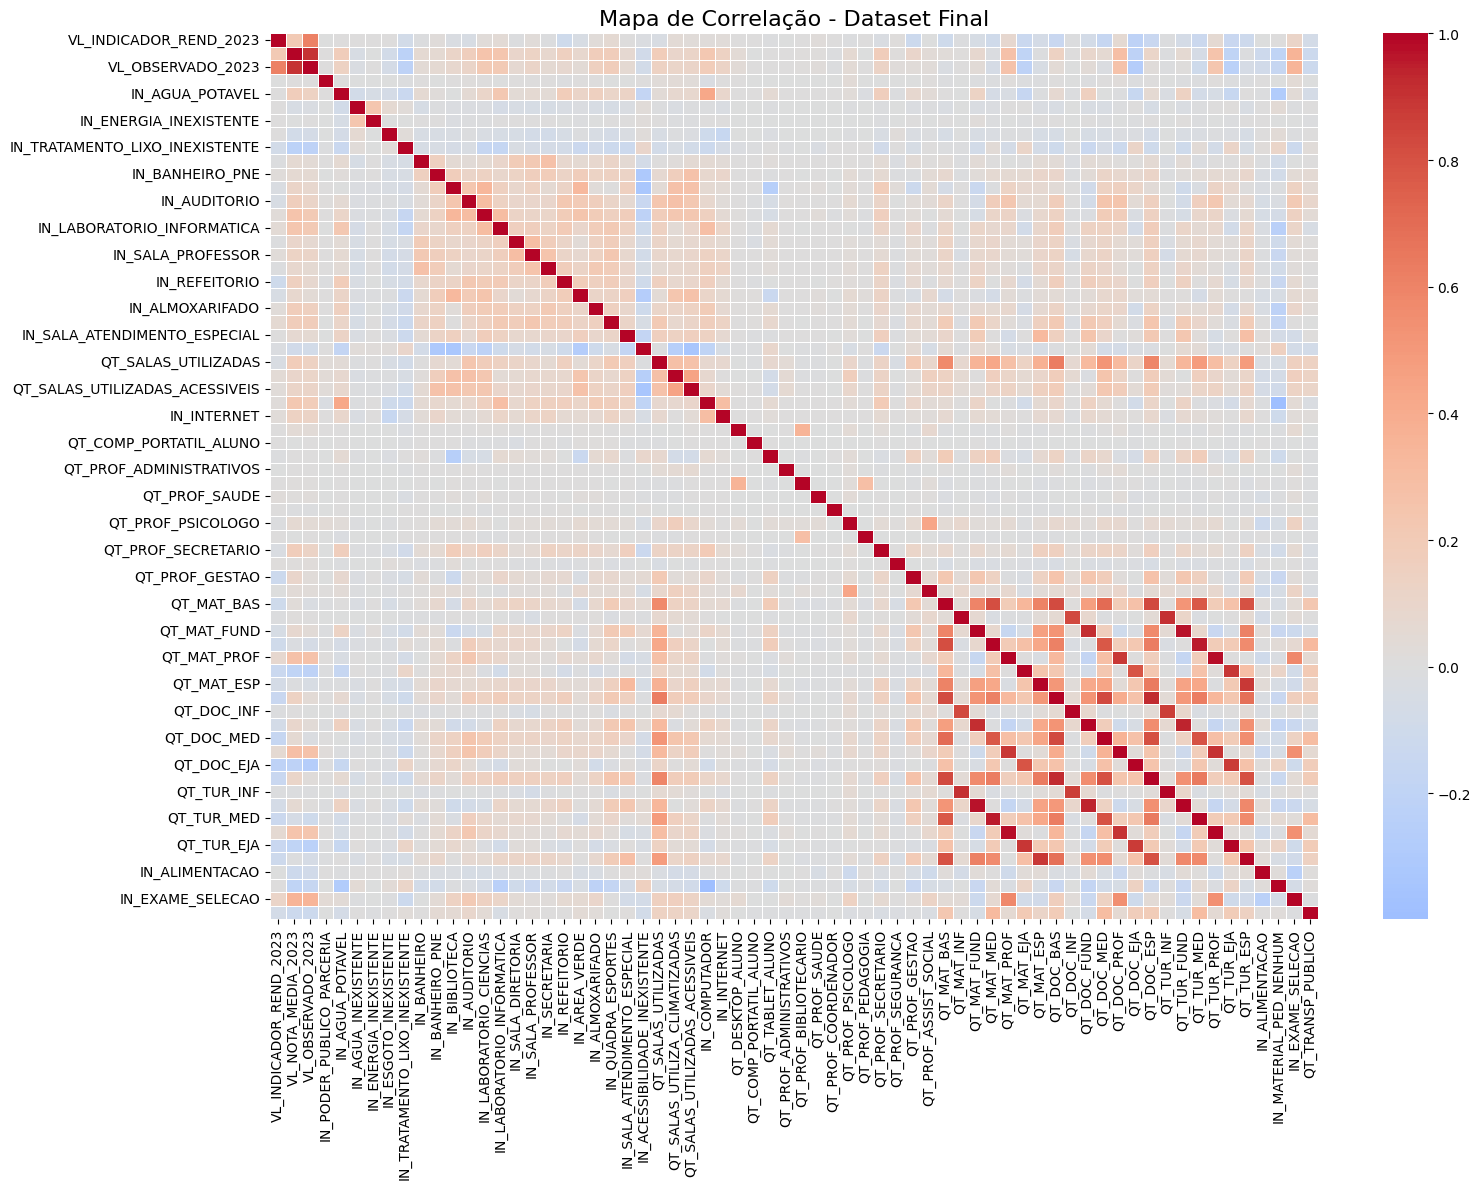

In [ ]:
df_corr = df_completo.drop(columns=["ID_ESCOLA"])

# Calcular correlação
corr = df_corr.corr(numeric_only=True)

# Plotar o heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Mapa de Correlação - Dataset Final", fontsize=16)
plt.tight_layout()
plt.show()

## 2.2 Distribuição da variável alvo VL_OBSERVADO_2023

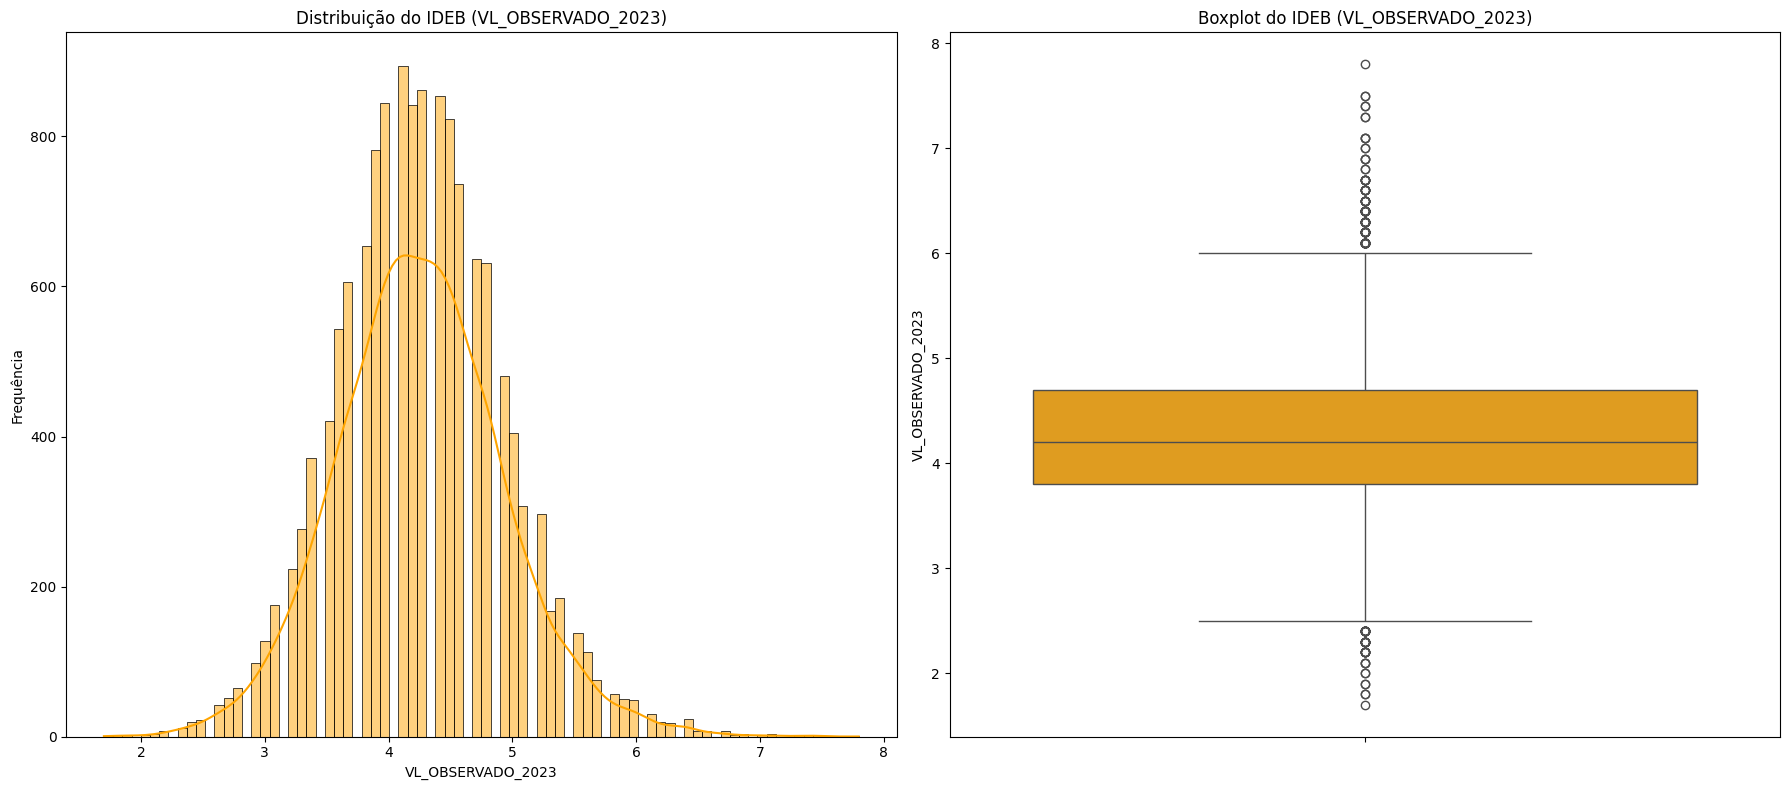

In [ ]:
vl_obs = df_completo['VL_OBSERVADO_2023']

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.histplot(vl_obs, ax=axs[0], kde=True, color='orange')
axs[0].set_title('Distribuição do IDEB (VL_OBSERVADO_2023)')
axs[0].set_xlabel('VL_OBSERVADO_2023')
axs[0].set_ylabel('Frequência')

sns.boxplot(y=vl_obs, ax=axs[1], color='orange')
axs[1].set_title('Boxplot do IDEB (VL_OBSERVADO_2023)')
axs[1].set_ylabel('VL_OBSERVADO_2023')


plt.tight_layout()
plt.show()

In [ ]:
# Calcular os quartis da variável VL_OBSERVADO_2023
quartiles = df_completo['VL_OBSERVADO_2023'].quantile([0.2, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8])

print("Quartis de VL_OBSERVADO_2023:")
print(quartiles)

Quartis de VL_OBSERVADO_2023:
0.20    3.7
0.25    3.8
0.40    4.1
0.50    4.2
0.60    4.4
0.75    4.7
0.80    4.8
Name: VL_OBSERVADO_2023, dtype: float64


## 2.3 Analisando recursos que serão features e fazendo alterações necessárias

In [ ]:
# Alteraremos df_final
df_final = df_completo.copy()

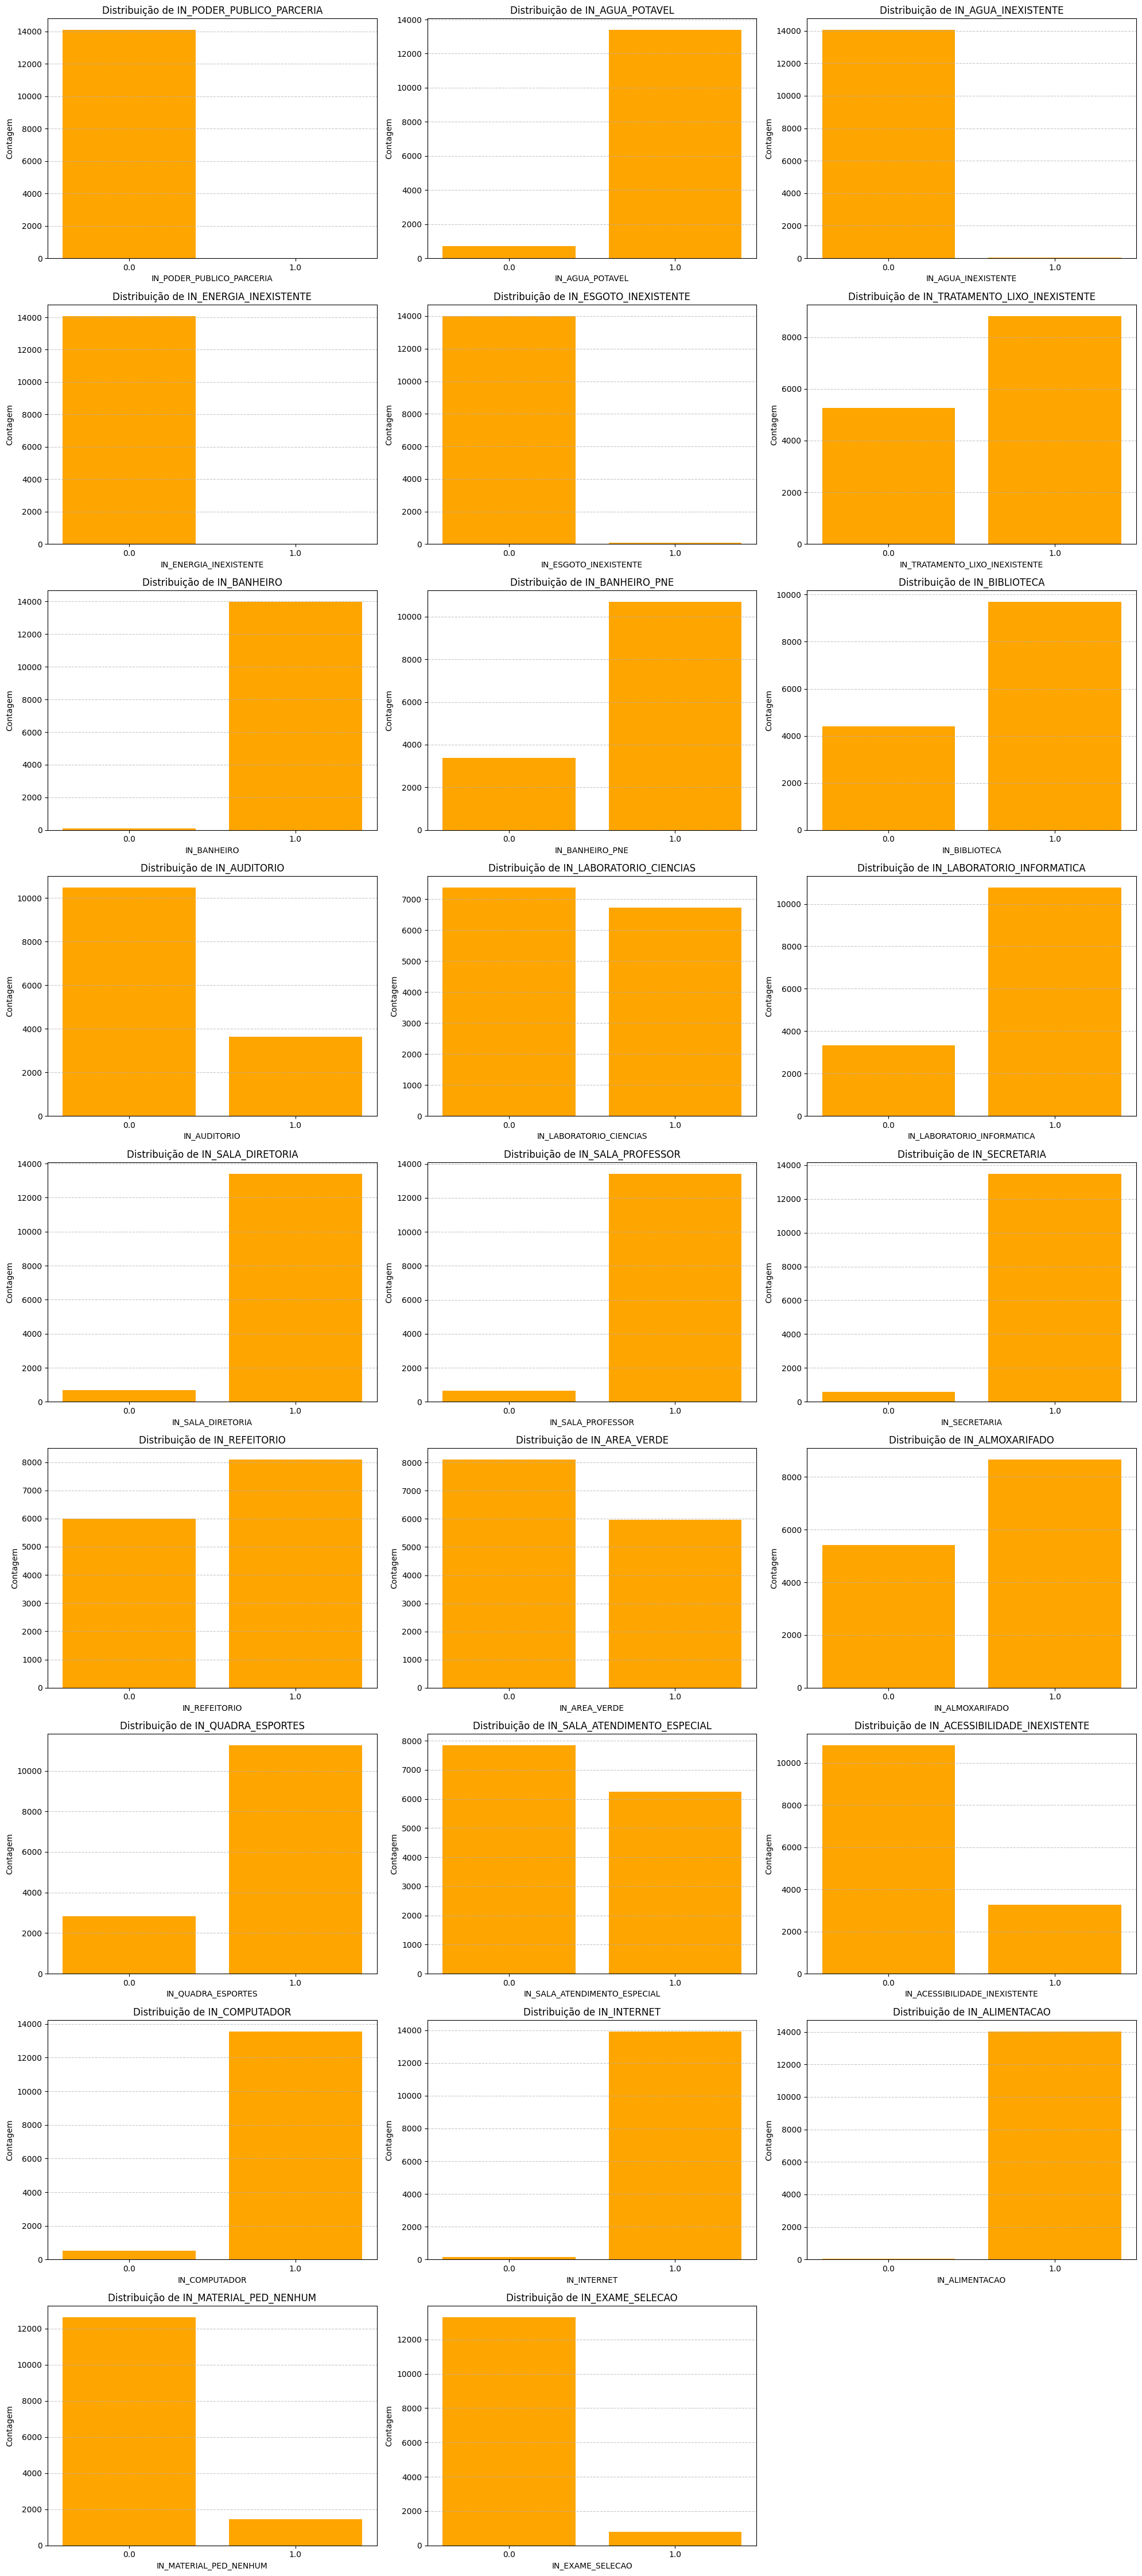

In [ ]:
# Criar figura e subplots
n_cols = 3
n_rows = (len(in_cols) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axs = axs.flatten()  # facilita iterar sobre os eixos

# Loop para plotar cada recurso
for i, recurso in enumerate(in_cols):
    # Agrupar por recurso e calcular a contagem de 0s e 1s
    counts = df_final[recurso].value_counts().sort_index()

    # Criar gráfico de barras
    axs[i].bar(counts.index.astype(str), counts.values, color='orange')
    axs[i].set_title(f'Distribuição de {recurso}')
    axs[i].set_xlabel(recurso)
    axs[i].set_ylabel('Contagem')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].set_xticks([0, 1]) # Ensure only 0 and 1 are shown as ticks

# Remover subplots extras caso existam
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
# Lista para armazenar colunas que serão removidas
to_drop = []

# Verifica a proporção de valores majoritários em cada coluna
for col in in_cols:
    freq = df_final[col].value_counts(normalize=True).max()  # frequência do valor mais comum
    if freq > 0.97:
        to_drop.append(col)

print("Colunas a serem removidas:", to_drop)

# Remove do DataFrame
df_final = df_final.drop(columns=to_drop)
print(df_final.shape)

Colunas a serem removidas: ['IN_PODER_PUBLICO_PARCERIA', 'IN_AGUA_INEXISTENTE', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_INTERNET', 'IN_ALIMENTACAO']
(14089, 62)


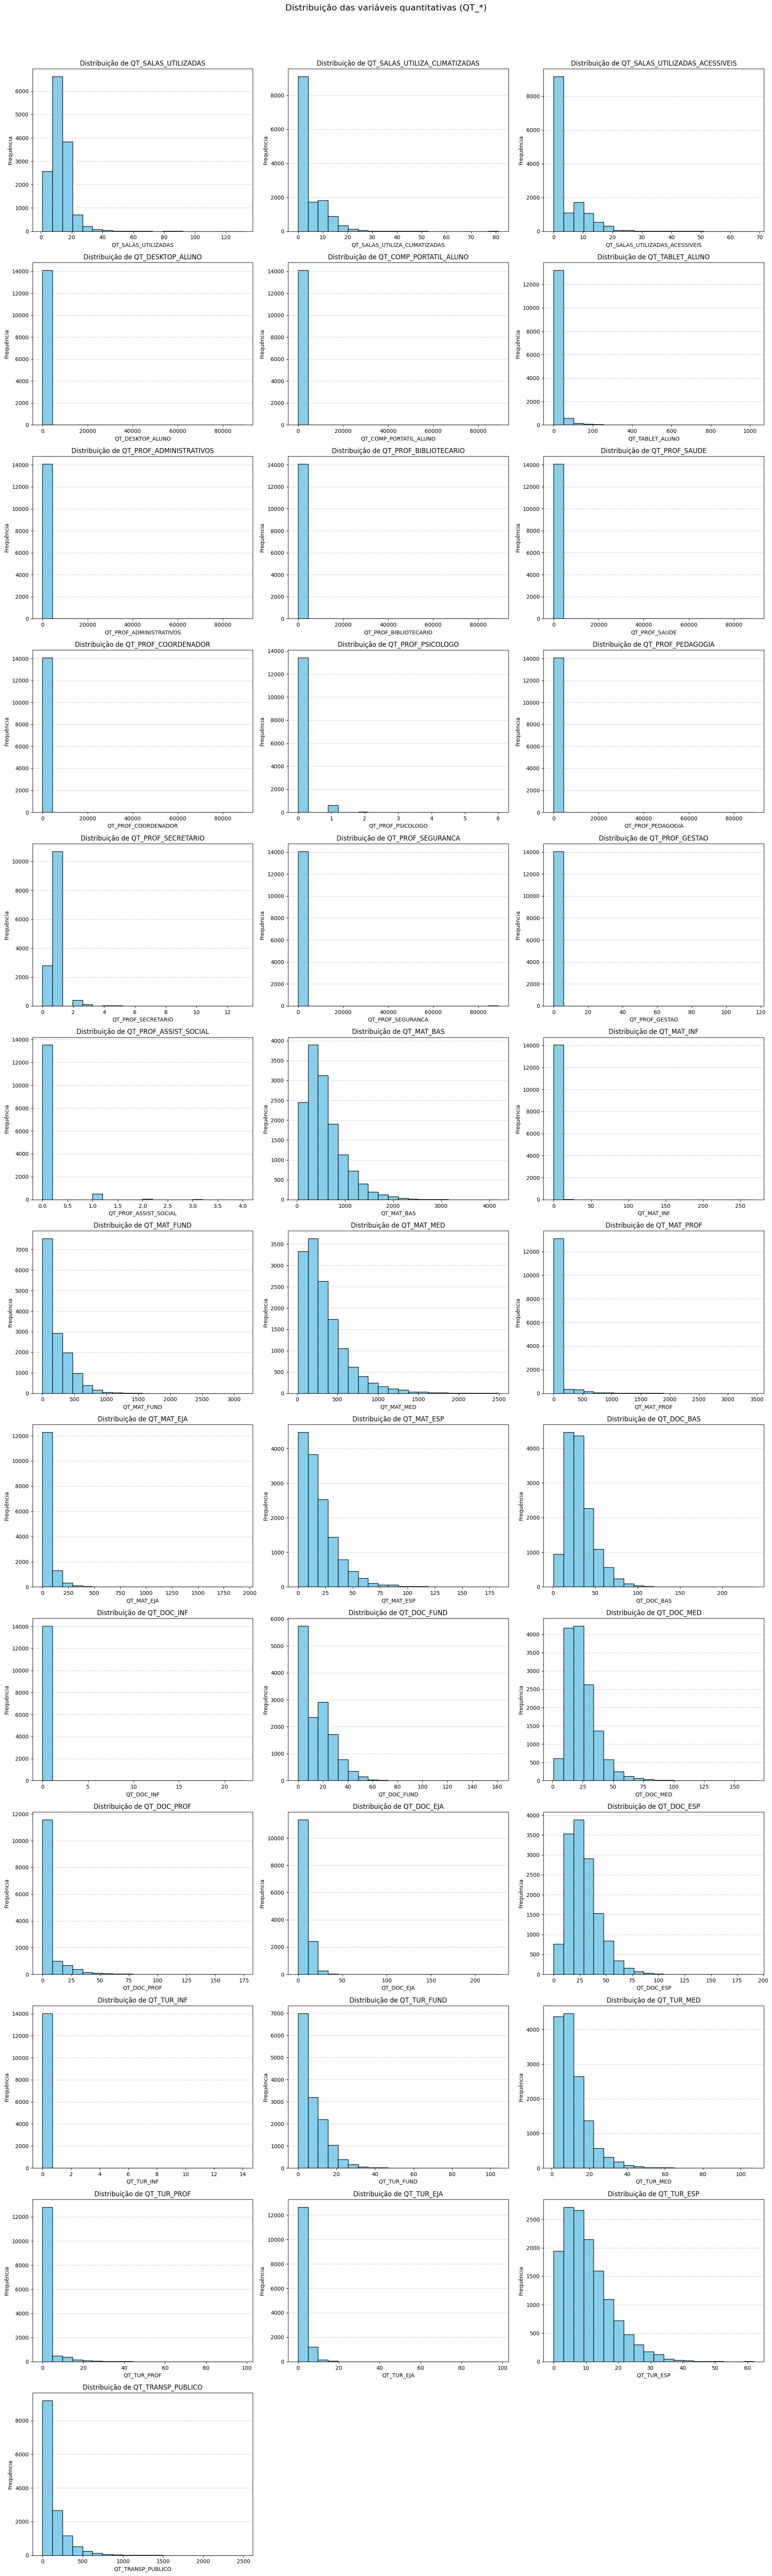

In [ ]:
# Número de colunas e linhas no grid de plots
n_cols = 3
n_rows = (len(quant_cols) + n_cols - 1) // n_cols

# Criar figura e subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axs = axs.flatten()

# Loop para plotar histogramas
for i, col in enumerate(quant_cols):
    data = df_final[col]

    axs[i].hist(data, bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribuição de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequência')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remover subplots extras caso existam
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Distribuição das variáveis quantitativas (QT_*)", fontsize=16, y=1.02)
plt.show()

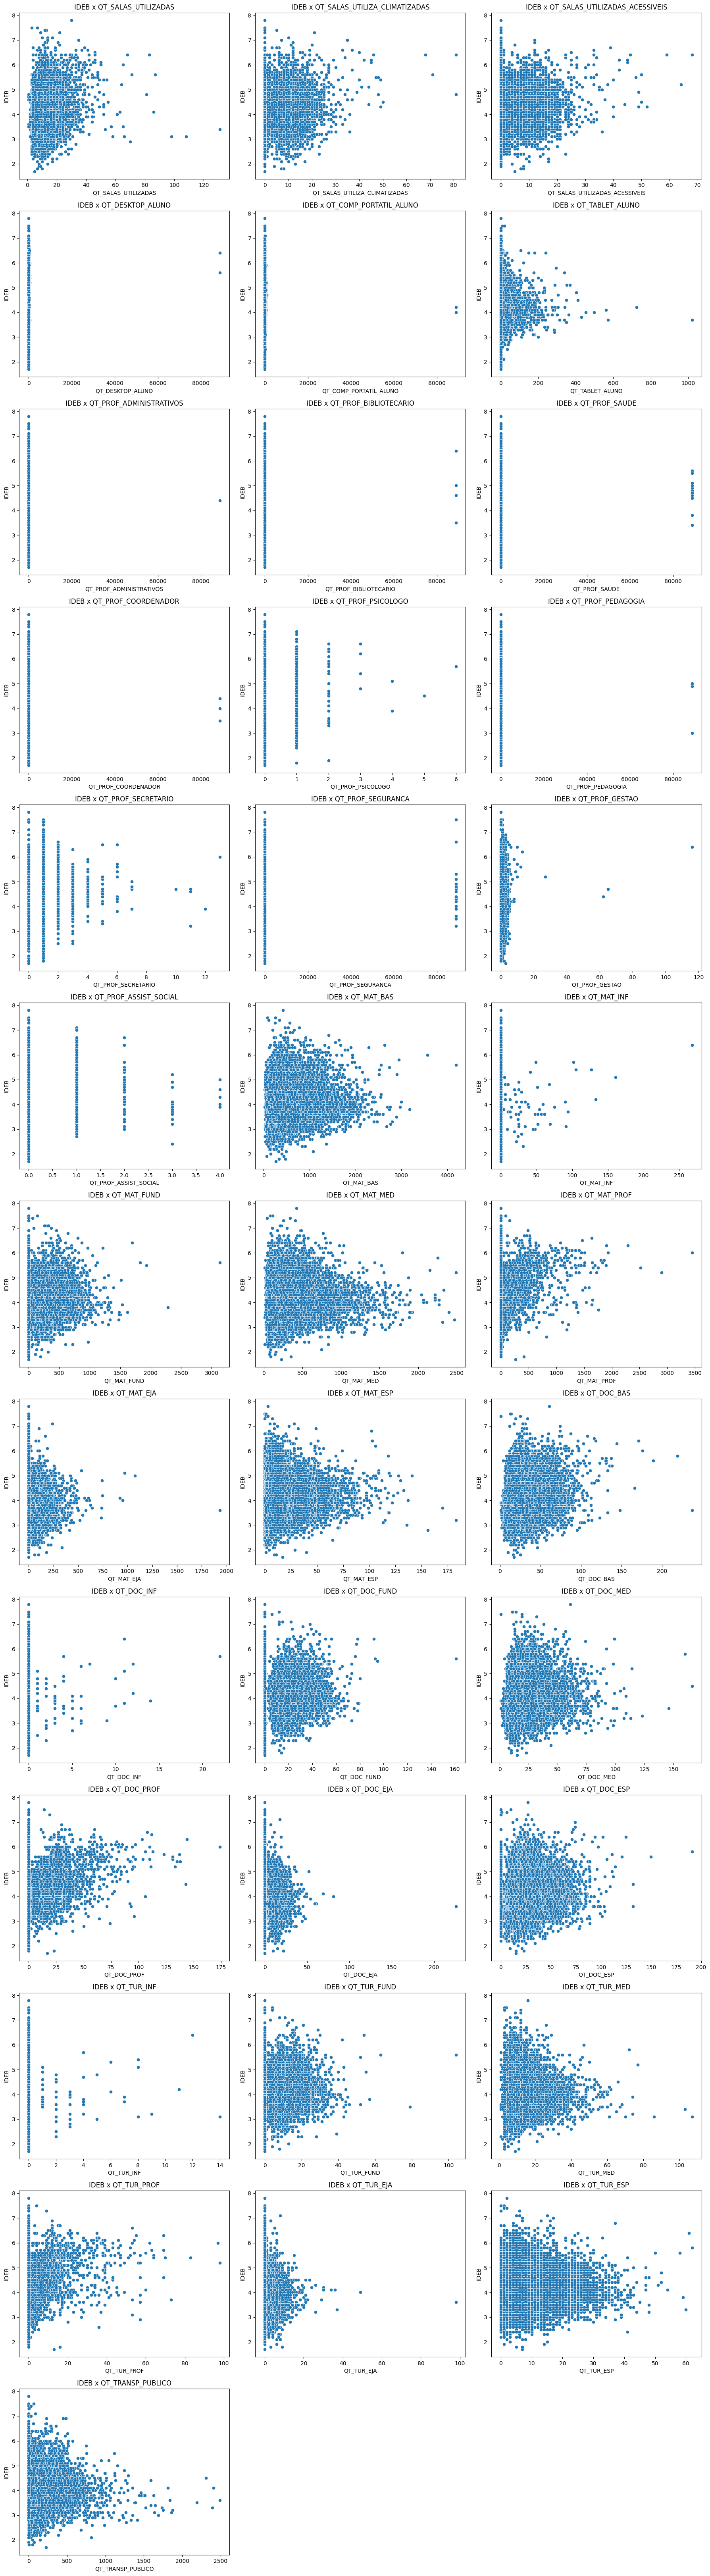

In [ ]:
# Configurar grid de plots
n_cols = 3
n_rows = (len(quant_cols) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axs = axs.flatten()

# Plotar scatterplots
for i, col in enumerate(quant_cols):
    sns.scatterplot(x=df_final[col], y=df_final["VL_OBSERVADO_2023"], ax=axs[i])
    axs[i].set_title(f"IDEB x {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("IDEB")

# Remover axes extras se houver
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
# Lista de colunas problemáticas
cols_outliers = [
    "QT_DESKTOP_ALUNO",
    "QT_COMP_PORTATIL_ALUNO",
    "QT_PROF_ADMINISTRATIVOS",
    "QT_PROF_SAUDE",
    "QT_PROF_BIBLIOTECARIO",
    "QT_PROF_COORDENADOR",
    "QT_PROF_PEDAGOGIA",
    "QT_PROF_SEGURANCA"
]

# Limite superior
limite = 10000

# Remover linhas onde alguma dessas colunas ultrapassa o limite
cond = (df_final[cols_outliers] > limite).any(axis=1)
print(f"Linhas removidas: {cond.sum()}")

df_final = df_final.loc[~cond].copy()
print(df_final.shape)

Linhas removidas: 46
(14043, 62)


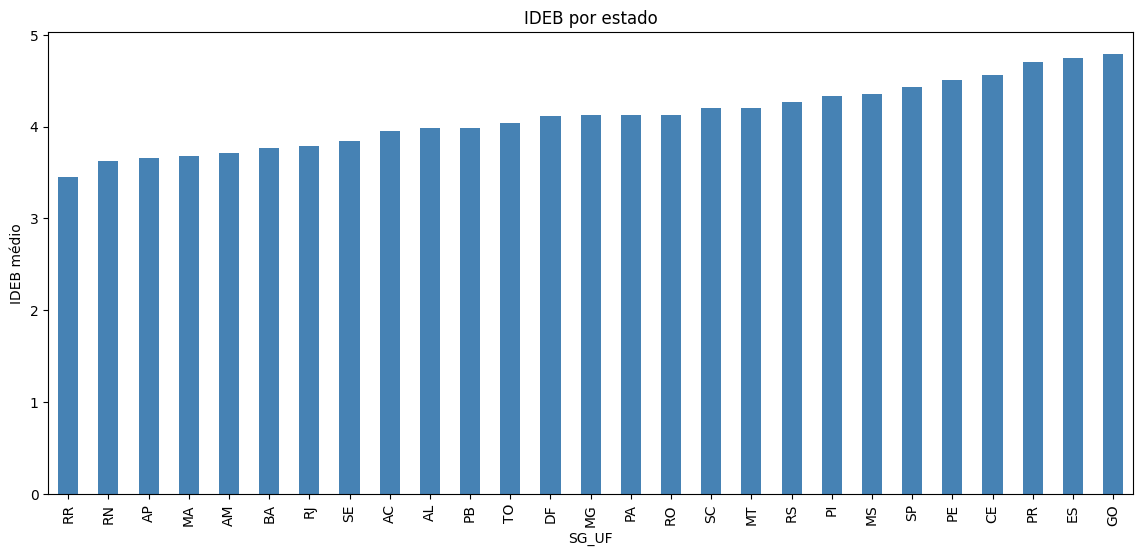

In [ ]:
media_estado = df_final.groupby("SG_UF")["VL_OBSERVADO_2023"].mean().sort_values()

plt.figure(figsize=(14,6))
media_estado.plot(kind="bar", color="steelblue")
plt.title("IDEB por estado")
plt.ylabel("IDEB médio")
plt.show()

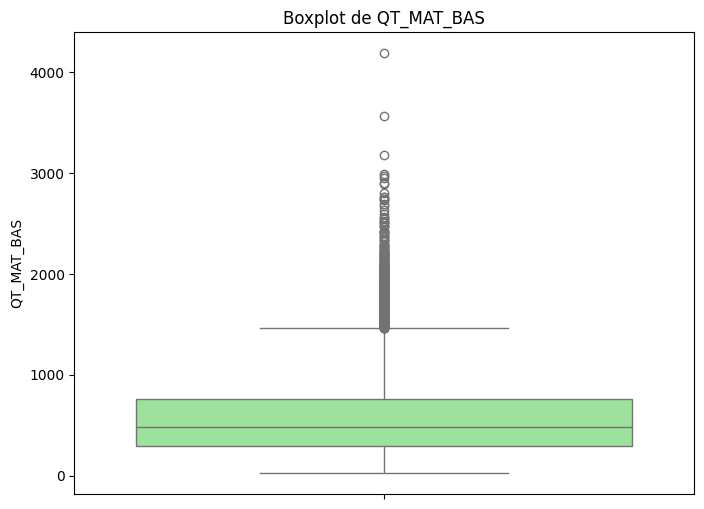

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_final['QT_MAT_BAS'], color='lightgreen')
plt.title('Boxplot de QT_MAT_BAS')
plt.ylabel('QT_MAT_BAS')
plt.show()

Quartis: 296.0 482.0 762.0


/tmp/ipython-input-1905426473.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PORTE_ESCOLA", y="VL_OBSERVADO_2023", data=df_final, palette="Set2")


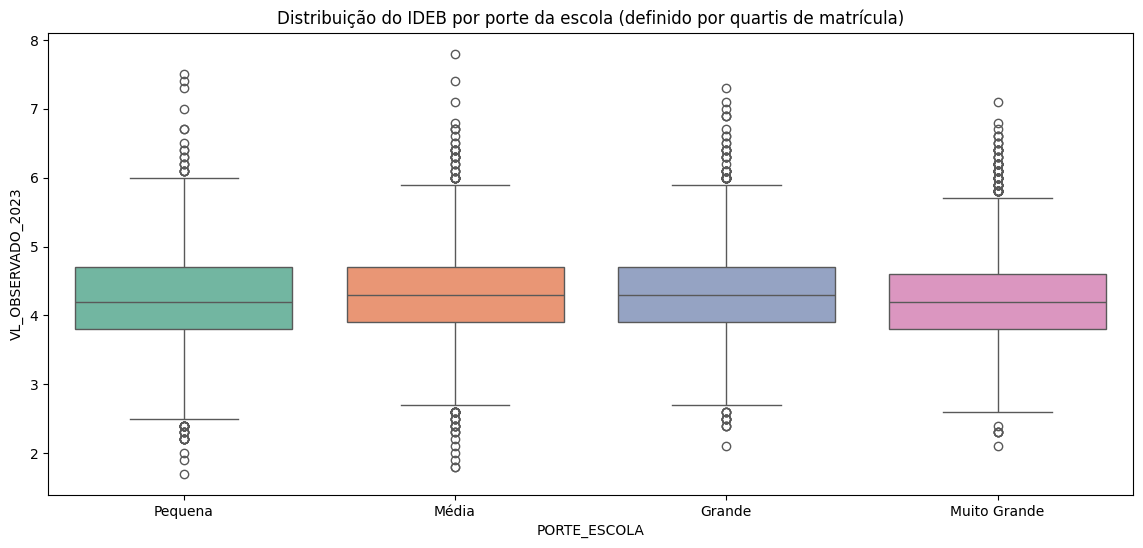

In [ ]:
# Calcular os quartis da variável
q1 = df_final["QT_MAT_BAS"].quantile(0.25)
q2 = df_final["QT_MAT_BAS"].quantile(0.50)  # mediana
q3 = df_final["QT_MAT_BAS"].quantile(0.75)

print("Quartis:", q1, q2, q3)

# Criar categorias com base nos quartis
df_final["PORTE_ESCOLA"] = pd.cut(
    df_final["QT_MAT_BAS"],
    bins=[0, q1, q2, q3, df_final["QT_MAT_BAS"].max() + 1],
    labels=["Pequena", "Média", "Grande", "Muito Grande"],
    include_lowest=True
)

# Visualização
plt.figure(figsize=(14,6))
sns.boxplot(x="PORTE_ESCOLA", y="VL_OBSERVADO_2023", data=df_final, palette="Set2")
plt.title("Distribuição do IDEB por porte da escola (definido por quartis de matrícula)")
plt.show()

In [ ]:
# Criando uma nova feature: Média de Professor por Aluno

df_final['MEDIA_ALUNO_PROF'] = df_final['QT_MAT_BAS'] / df_final['QT_DOC_BAS']

display(df_final[['QT_MAT_BAS', 'QT_DOC_BAS', 'MEDIA_ALUNO_PROF']].head())

QT_MAT_BAS  QT_DOC_BAS  MEDIA_ALUNO_PROF
0       649.0        45.0         14.422222
1       305.0        17.0         17.941176
2       733.0        25.0         29.320000
3      1363.0        44.0         30.977273
4      1486.0        44.0         33.772727

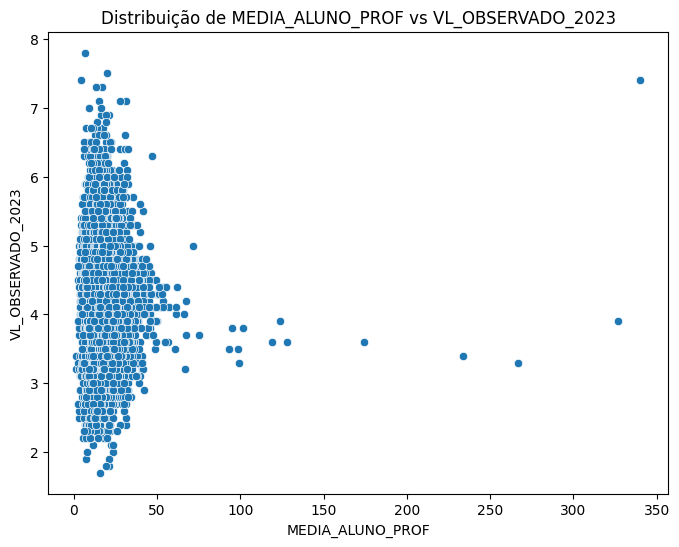

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_final['MEDIA_ALUNO_PROF'], y=df_final['VL_OBSERVADO_2023'])
plt.title('Distribuição de MEDIA_ALUNO_PROF vs VL_OBSERVADO_2023')
plt.xlabel('MEDIA_ALUNO_PROF')
plt.ylabel('VL_OBSERVADO_2023')
plt.show()

## 2.4 Processamento após análise das variáveis e formulação do dataset final
---



In [ ]:
df_final.shape

(14043, 64)

In [ ]:
# Calcular os quartis da variável VL_OBSERVADO_2023
quartiles = df_completo['VL_OBSERVADO_2023'].quantile([0.2, 0.25, 0.33, 0.4, 0.5, 0.6, 0.66, 0.75, 0.8])

print("Quartis de VL_OBSERVADO_2023:")
print(quartiles)

Quartis de VL_OBSERVADO_2023:
0.20    3.7
0.25    3.8
0.33    4.0
0.40    4.1
0.50    4.2
0.60    4.4
0.66    4.5
0.75    4.7
0.80    4.8
Name: VL_OBSERVADO_2023, dtype: float64


In [ ]:
#bins = [0.0, 3.6, 4.0, 4.5, 5.0, 10.0]
#bins = [0.0, 3.7, 4.1, 4.4, 4.9, 10.0]
bins = [0.0, 4.0, 4.5, 10.0]
labels = [0, 1, 2]

df_final["CLASSE_IDEB"] = pd.cut(
    df_final["VL_OBSERVADO_2023"],
    bins=bins,
    right = False
)

df_final["CLASSE_IDEB"] = df_final["CLASSE_IDEB"].cat.codes

In [ ]:
df_final["CLASSE_IDEB"].value_counts()

CLASSE_IDEB
2    5259
0    4501
1    4283
Name: count, dtype: int64

# 3. Construção dos modelos preditivos

## 3.1 Construindo vetores X e y

In [ ]:
X = df_final.drop(columns=["ID_ESCOLA", "NO_ENTIDADE", "SG_UF", "VL_OBSERVADO_2023","VL_NOTA_MEDIA_2023","VL_INDICADOR_REND_2023", "PORTE_ESCOLA", "CLASSE_IDEB"])
y = df_final["CLASSE_IDEB"]

# Colunas que necessitam de normalização
cols_numericas = quant_cols + ["MEDIA_ALUNO_PROF"]

## 3.2 Rede Neural
---
Construindo rede neural com melhores hiperparâmetros, calculados abaixo

In [ ]:
BATCH_SIZE = 128
RANDOM_STATE = 32
N_CLASSES = 3

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

scaler = StandardScaler()
X_train.loc[:, cols_numericas] = scaler.fit_transform(X_train[cols_numericas])
X_val.loc[:, cols_numericas] = scaler.transform(X_val[cols_numericas])

# One-Hot Encoding
y_train_ohe = to_categorical(y_train, num_classes=N_CLASSES)
y_val_ohe = to_categorical(y_val, num_classes=N_CLASSES)

### 3.2.1 Validação estática


In [ ]:
N = X_train.shape[0]
d = X_train.shape[1]
n = N / (10 * (d + 1))

print(f"N = {N}")
print(f"d = {d}")
print(f"n = {n}")

N = 8987
d = 57
n = 15.494827586206897


In [ ]:
model = Sequential()
model.add(Input(shape=(d,)))

model.add(Dense(10, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(N_CLASSES, kernel_initializer='he_normal', activation='softmax'))

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, restore_best_weights=True)

history = model.fit(X_train.astype('float32'), y_train_ohe, validation_data=(X_val.astype('float32'), y_val_ohe), epochs=200, batch_size=BATCH_SIZE, callbacks=[es])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653 (2.55 KB)

 Trainable params: 653 (2.55 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3693 - loss: 1.1485 - val_accuracy: 0.4072 - val_loss: 1.0961
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3945 - loss: 1.1075 - val_accuracy: 0.4228 - val_loss: 1.0863
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4217 - loss: 1.1001 - val_accuracy: 0.4317 - val_loss: 1.0789
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4217 - loss: 1.0870 - val_accuracy: 0.4593 - val_loss: 1.0641
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4536 - loss: 1.0677 - val_accuracy: 0.4820 - val_loss: 1.0522
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4567 - loss: 1.0576 - val_accuracy: 0.4895 - val_loss: 1.0414
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4699 - loss: 1.0617 - val_accuracy: 0.4984 - val_loss: 1.0330
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4838 - loss: 1.0449 - val_accuracy: 0.499

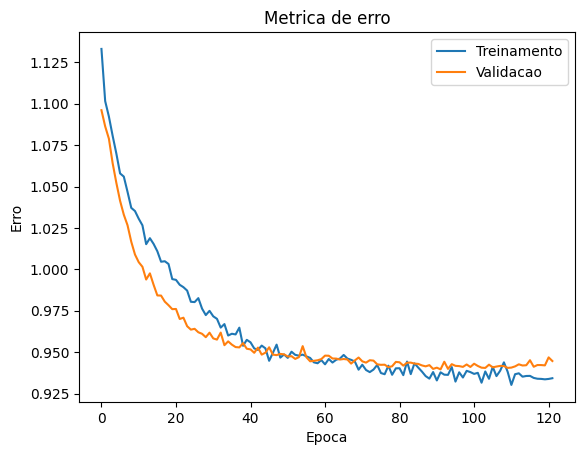

Loss final do Treino: 0.9343
Loss final da Validação: 0.9447


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Printando resultados
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Loss final do Treino: {final_train_loss:.4f}")
print(f"Loss final da Validação: {final_val_loss:.4f}")

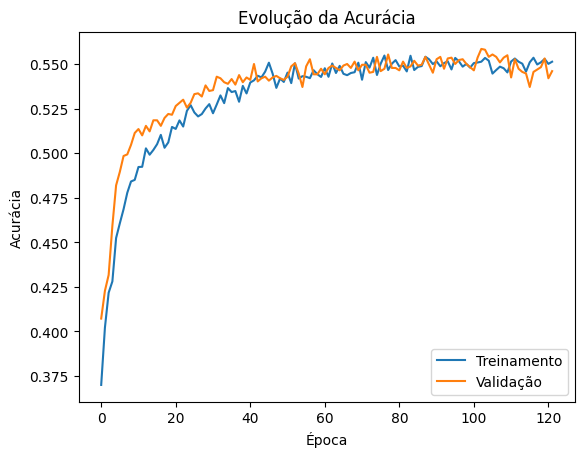

Acurácia final do Treino: 0.5514
Acurácia final da Validação: 0.5461


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Evolução da Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.show()

# Printando resultados
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Acurácia final do Treino: {final_train_accuracy:.4f}")
print(f"Acurácia final da Validação: {final_val_accuracy:.4f}")


### 3.2.2 Validação estática com KFold
---
Verificamos em rede neural com apenas 1 camada escondida, e depois com 2 camadas escondidas, mantendo o número total de neurônios

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Garante que os dados são arrays numpy para o KFold
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)


--- Treinando Fold 1/6 ---
Restoring model weights from the end of the best epoch: 186.


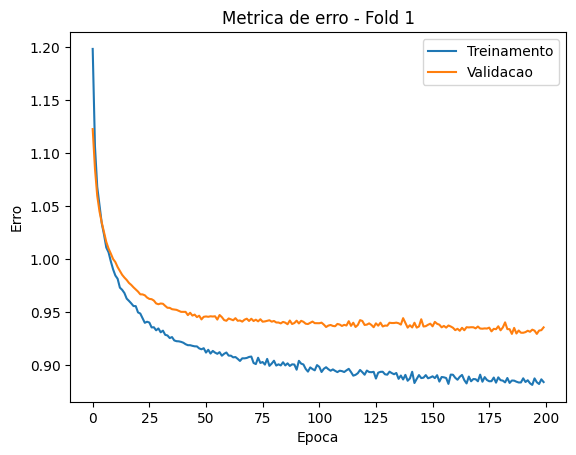

--> Acuracia (treino): 0.6008
--> Acuracia (validacao): 0.5489
--> E_val - E_in = 0.0748
--> acc_in - acc_val = 0.0519


--- Treinando Fold 2/6 ---
Epoch 78: early stopping
Restoring model weights from the end of the best epoch: 58.


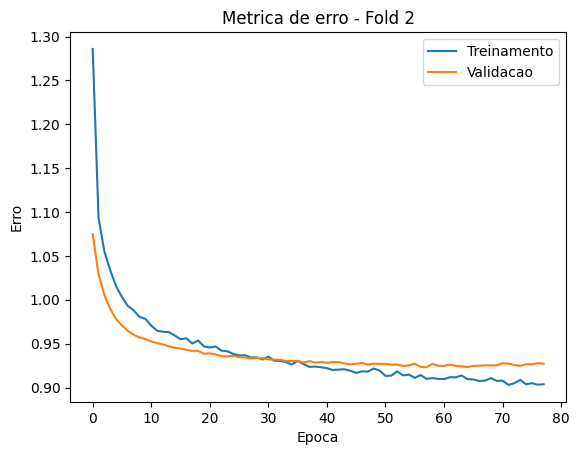

--> Acuracia (treino): 0.5857
--> Acuracia (validacao): 0.5659
--> E_val - E_in = 0.0343
--> acc_in - acc_val = 0.0198


--- Treinando Fold 3/6 ---
Epoch 80: early stopping
Restoring model weights from the end of the best epoch: 60.


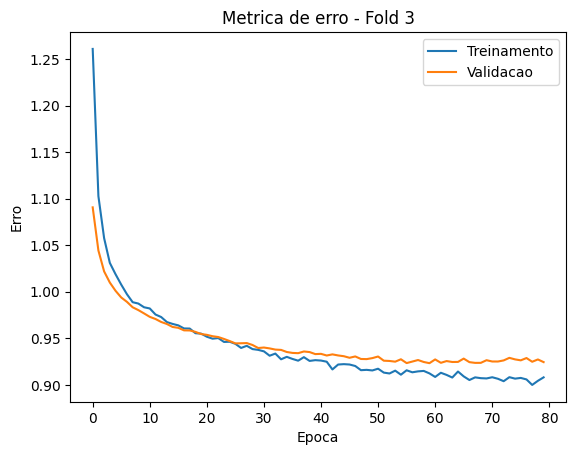

--> Acuracia (treino): 0.5796
--> Acuracia (validacao): 0.5609
--> E_val - E_in = 0.0362
--> acc_in - acc_val = 0.0187


--- Treinando Fold 4/6 ---
Epoch 157: early stopping
Restoring model weights from the end of the best epoch: 137.


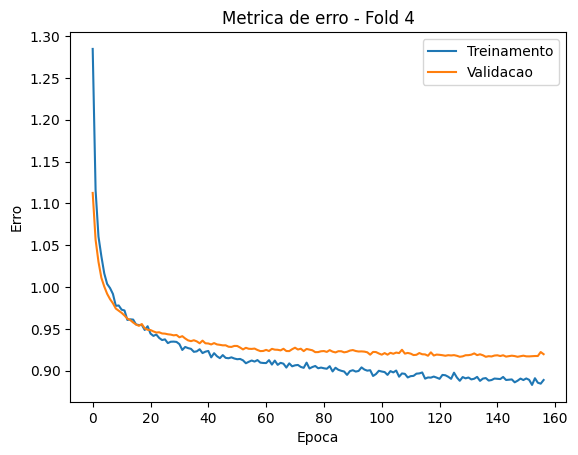

--> Acuracia (treino): 0.5988
--> Acuracia (validacao): 0.5662
--> E_val - E_in = 0.0554
--> acc_in - acc_val = 0.0326


--- Treinando Fold 5/6 ---
Epoch 106: early stopping
Restoring model weights from the end of the best epoch: 86.


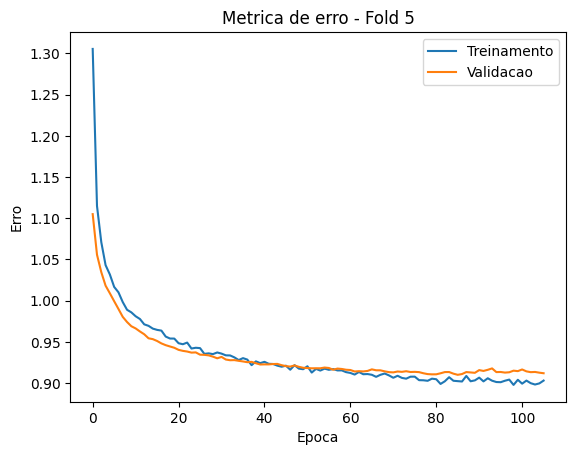

--> Acuracia (treino): 0.5883
--> Acuracia (validacao): 0.5726
--> E_val - E_in = 0.0324
--> acc_in - acc_val = 0.0157


--- Treinando Fold 6/6 ---
Epoch 83: early stopping
Restoring model weights from the end of the best epoch: 63.


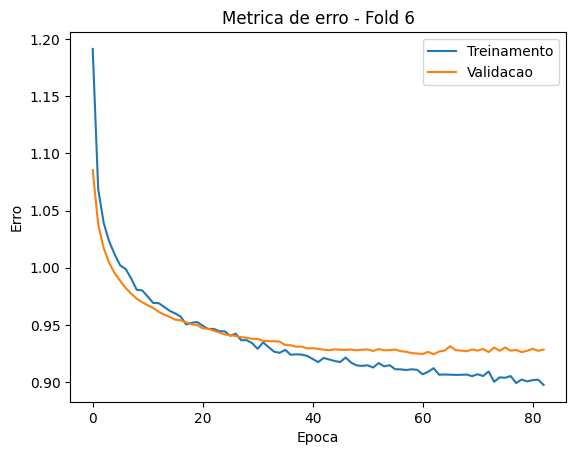

--> Acuracia (treino): 0.5934
--> Acuracia (validacao): 0.5614
--> E_val - E_in = 0.0396
--> acc_in - acc_val = 0.0319


✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)
Média Acuracia (treino): 0.5911 (+/- 0.0074)
Média Acuracia (validacao): 0.5627 (+/- 0.0073)
Média Erro de Generalização (E_val - E_in): 0.0455


In [ ]:
# Com 1 camada escondida
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []
i = 0

for train_index, val_index in skf.split(X_train_np, y_train_np):
    i = i + 1
    print(f"\n--- Treinando Fold {i}/6 ---")

    # Separar dados do Fold
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Criar DataFrames temporários para usar .loc
    X_train_fold_df = pd.DataFrame(X_train_fold, columns=X_train.columns)
    X_val_fold_df   = pd.DataFrame(X_val_fold, columns=X_train.columns)

    # Normalização apenas nas colunas numéricas
    scaler = StandardScaler()
    X_train_fold_df.loc[:, cols_numericas] = scaler.fit_transform(X_train_fold_df[cols_numericas])
    X_val_fold_df.loc[:, cols_numericas] = scaler.transform(X_val_fold_df[cols_numericas])

    # Converter DataFrames de volta para arrays numpy
    X_train_fold = X_train_fold_df.values
    X_val_fold = X_val_fold_df.values

    # One-Hot Encoding (OHE)
    y_train_ohe = to_categorical(y_train_fold, num_classes=N_CLASSES)
    y_val_ohe = to_categorical(y_val_fold, num_classes=N_CLASSES)

    # Recriação do Modelo
    model = Sequential()
    model.add(Input(shape=(d,)))

    # Camada Oculta Única
    model.add(Dense(15, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))

    # CAMADA DE SAÍDA
    model.add(Dense(N_CLASSES, kernel_initializer='he_normal', activation='softmax'))

    # Compilar o modelo
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Treina o modelo
    history = model.fit(
        X_train_fold, y_train_ohe,
        validation_data=(X_val_fold, y_val_ohe),
        epochs=200,
        batch_size=BATCH_SIZE,
        callbacks=[es_callback],
        verbose=0
    )
    history_list.append(history)

    # Avalia o modelo
    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_ohe, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model.evaluate(X_val_fold, y_val_ohe, batch_size=BATCH_SIZE, verbose=0)

    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

# Cálculo e exibição da média
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

print("\n" + "="*70)
print("✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)")
print(f"Média Acuracia (treino): {avg_accuracy_train:.4f} (+/- {np.std(accuracies_train):.4f})")
print(f"Média Acuracia (validacao): {avg_accuracy_val:.4f} (+/- {np.std(accuracies_val):.4f})")
print(f"Média Erro de Generalização (E_val - E_in): {avg_eval - avg_ein:.4f}")
print("="*70)


--- Treinando Fold 1/6 ---
Epoch 80: early stopping
Restoring model weights from the end of the best epoch: 60.


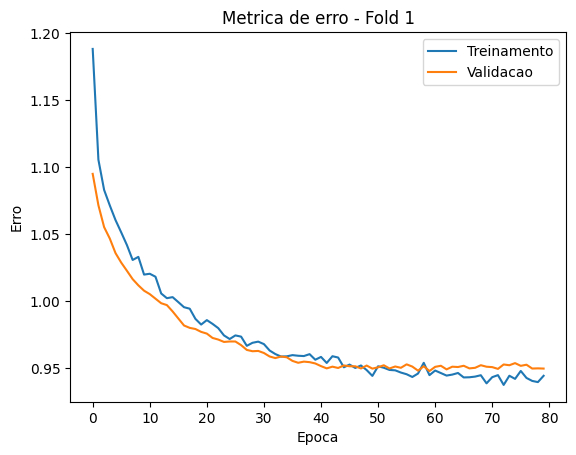

--> Acuracia (treino): 0.5708
--> Acuracia (validacao): 0.5339
--> E_val - E_in = 0.0446
--> acc_in - acc_val = 0.0369


--- Treinando Fold 2/6 ---
Epoch 125: early stopping
Restoring model weights from the end of the best epoch: 105.


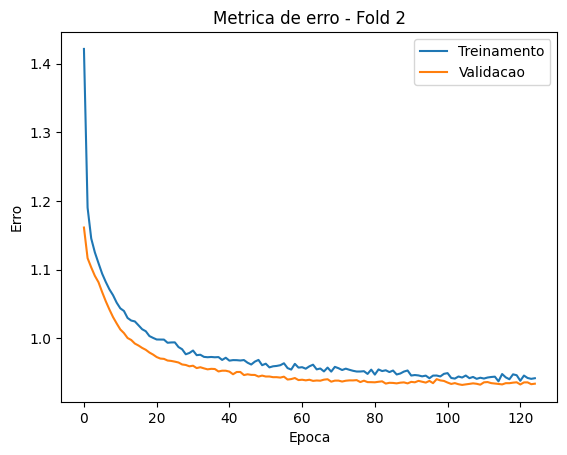

--> Acuracia (treino): 0.5758
--> Acuracia (validacao): 0.5489
--> E_val - E_in = 0.0315
--> acc_in - acc_val = 0.0269


--- Treinando Fold 3/6 ---
Epoch 115: early stopping
Restoring model weights from the end of the best epoch: 95.


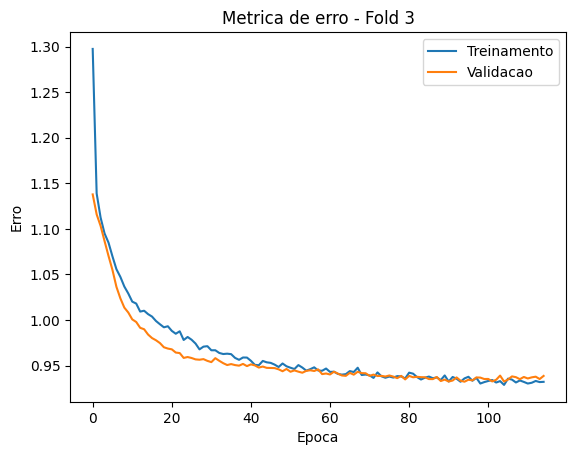

--> Acuracia (treino): 0.5755
--> Acuracia (validacao): 0.5497
--> E_val - E_in = 0.0348
--> acc_in - acc_val = 0.0258


--- Treinando Fold 4/6 ---
Epoch 113: early stopping
Restoring model weights from the end of the best epoch: 93.


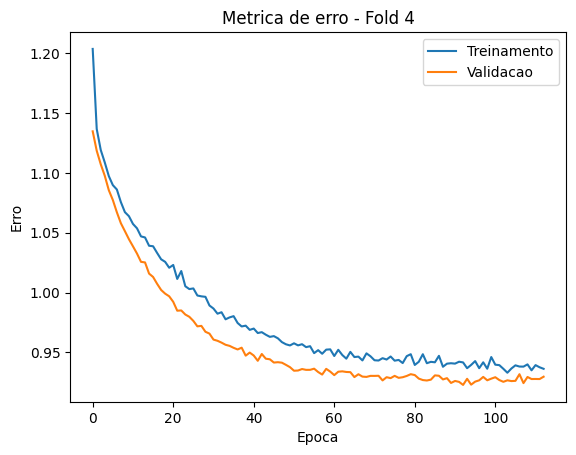

--> Acuracia (treino): 0.5728
--> Acuracia (validacao): 0.5566
--> E_val - E_in = 0.0237
--> acc_in - acc_val = 0.0162


--- Treinando Fold 5/6 ---
Epoch 147: early stopping
Restoring model weights from the end of the best epoch: 127.


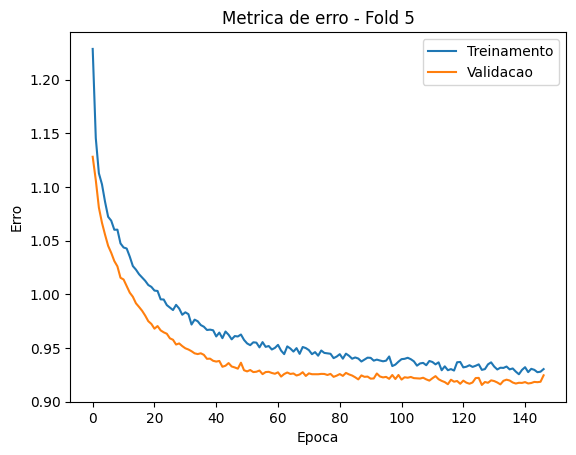

--> Acuracia (treino): 0.5701
--> Acuracia (validacao): 0.5652
--> E_val - E_in = 0.0198
--> acc_in - acc_val = 0.0049


--- Treinando Fold 6/6 ---
Epoch 80: early stopping
Restoring model weights from the end of the best epoch: 60.


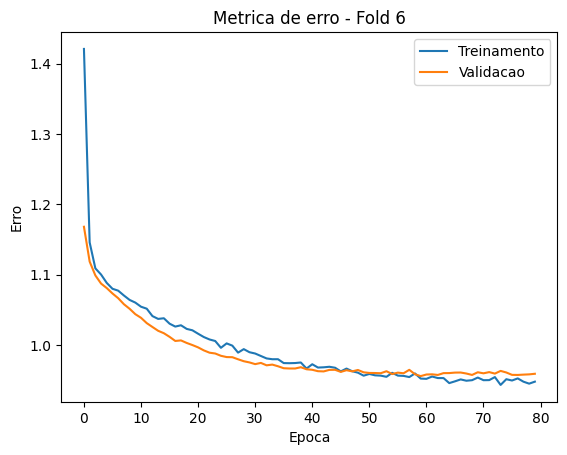

--> Acuracia (treino): 0.5655
--> Acuracia (validacao): 0.5321
--> E_val - E_in = 0.0370
--> acc_in - acc_val = 0.0334


✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)
Média Acuracia (treino): 0.5717 (+/- 0.0035)
Média Acuracia (validacao): 0.5477 (+/- 0.0117)
Média Erro de Generalização (E_val - E_in): 0.0319


In [ ]:
# Com 2 camadas escondidas
accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []
i = 0

for train_index, val_index in skf.split(X_train_np, y_train_np):
    i = i + 1
    print(f"\n--- Treinando Fold {i}/6 ---")

    # Separar dados do Fold
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Criar DataFrames temporários para usar .loc
    X_train_fold_df = pd.DataFrame(X_train_fold, columns=X_train.columns)
    X_val_fold_df   = pd.DataFrame(X_val_fold, columns=X_train.columns)

    # Normalização apenas nas colunas numéricas
    scaler = StandardScaler()
    X_train_fold_df.loc[:, cols_numericas] = scaler.fit_transform(X_train_fold_df[cols_numericas])
    X_val_fold_df.loc[:, cols_numericas] = scaler.transform(X_val_fold_df[cols_numericas])

    # Converter DataFrames de volta para arrays numpy
    X_train_fold = X_train_fold_df.values
    X_val_fold = X_val_fold_df.values

    # One-Hot Encoding (OHE)
    y_train_ohe = to_categorical(y_train_fold, num_classes=N_CLASSES)
    y_val_ohe = to_categorical(y_val_fold, num_classes=N_CLASSES)

    # Recriação do Modelo
    model = Sequential()
    model.add(Input(shape=(d,)))

    # Camada Oculta Única
    model.add(Dense(10, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))

    # CAMADA DE SAÍDA
    model.add(Dense(N_CLASSES, kernel_initializer='he_normal', activation='softmax'))

    # Compilar o modelo
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Treina o modelo
    history = model.fit(
        X_train_fold, y_train_ohe,
        validation_data=(X_val_fold, y_val_ohe),
        epochs=200,
        batch_size=BATCH_SIZE,
        callbacks=[es_callback],
        verbose=0
    )
    history_list.append(history)

    # Avalia o modelo
    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_ohe, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model.evaluate(X_val_fold, y_val_ohe, batch_size=BATCH_SIZE, verbose=0)

    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

# Cálculo e exibição da média
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

print("\n" + "="*70)
print("✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)")
print(f"Média Acuracia (treino): {avg_accuracy_train:.4f} (+/- {np.std(accuracies_train):.4f})")
print(f"Média Acuracia (validacao): {avg_accuracy_val:.4f} (+/- {np.std(accuracies_val):.4f})")
print(f"Média Erro de Generalização (E_val - E_in): {avg_eval - avg_ein:.4f}")
print("="*70)

### 3.2.3 Buscando melhores hiperparâmetros utilizando KFold

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Garante que os dados são arrays numpy para o KFold
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definição de hiperparâmetros a testar
param_grid = {
    "units": [15],
    "dropout": [0.0, 0.2, 0.3],
    "l2_reg": [0.001, 0.01],
    "lr": [0.0005, 0.001],
    "actv_ki": [('relu', 'he_normal'), ('tanh', 'glorot_uniform'), ('sigmoid', 'glorot_uniform'), ('selu', 'lecun_normal')]
}

# Gerar todas as combinações
param_combinations = list(product(
    param_grid["units"],
    param_grid["dropout"],
    param_grid["l2_reg"],
    param_grid["lr"],
    param_grid["actv_ki"]
))

results = []

for (units, dropout, l2_reg, lr, actv_ki) in param_combinations:
    print("\n" + "="*70)
    print(f"Testando: units={units}, dropout={dropout}, l2={l2_reg}, lr={lr}, "
          f"activation={actv_ki[0]}, init={actv_ki[1]}")

    accuracies_train = []
    accuracies_val = []
    ein_list = []
    eval_list = []

    for i, (train_index, val_index) in enumerate(skf.split(X_train_np, y_train_np), start=1):
        print(f"\n--- Fold {i}/{skf.n_splits} ---")

        # Separar dados
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

        # Criar DataFrames temporários para usar .loc
        X_train_fold_df = pd.DataFrame(X_train_fold, columns=X_train.columns)
        X_val_fold_df   = pd.DataFrame(X_val_fold, columns=X_train.columns)

        # Normalização apenas nas colunas numéricas
        scaler = StandardScaler()
        X_train_fold_df.loc[:, cols_numericas] = scaler.fit_transform(X_train_fold_df[cols_numericas])
        X_val_fold_df.loc[:, cols_numericas] = scaler.transform(X_val_fold_df[cols_numericas])

        # Converter DataFrames de volta para arrays numpy
        X_train_fold = X_train_fold_df.values
        X_val_fold = X_val_fold_df.values

        # One-hot encoding
        y_train_ohe = to_categorical(y_train_fold, num_classes=N_CLASSES)
        y_val_ohe = to_categorical(y_val_fold, num_classes=N_CLASSES)

        # Modelo parametrizado
        model = Sequential()
        model.add(Input(shape=(d,)))
        model.add(Dense(units,
                        kernel_initializer=actv_ki[1],
                        kernel_regularizer=regularizers.l2(l2_reg),
                        activation=actv_ki[0]))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES, kernel_initializer=actv_ki[1], activation='softmax'))

        # Compilação com LR variável
        model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=lr),
                      metrics=['accuracy'])

        # Treinamento
        history = model.fit(
            X_train_fold, y_train_ohe,
            validation_data=(X_val_fold, y_val_ohe),
            epochs=200,
            batch_size=BATCH_SIZE,
            callbacks=[es_callback],
            verbose=0
        )

        # Avaliação
        E_in, acc_train = model.evaluate(X_train_fold, y_train_ohe, batch_size=BATCH_SIZE, verbose=0)
        E_val, acc_val = model.evaluate(X_val_fold, y_val_ohe, batch_size=BATCH_SIZE, verbose=0)

        accuracies_train.append(acc_train)
        accuracies_val.append(acc_val)
        ein_list.append(E_in)
        eval_list.append(E_val)

        print(f"Fold {i} -> acc_train={acc_train:.4f}, acc_val={acc_val:.4f}")

    # Estatísticas dos folds para esse conjunto de hiperparâmetros
    avg_train = np.mean(accuracies_train)
    avg_val = np.mean(accuracies_val)
    avg_ein = np.mean(ein_list)
    avg_eval = np.mean(eval_list)

    print(f"Média Acuracia (treino): {avg_train:.4f} (+/- {np.std(accuracies_train):.4f})")
    print(f"Média Acuracia (validacao): {avg_val:.4f} (+/- {np.std(accuracies_val):.4f})")
    print(f"Média Erro de Generalização (E_val - E_in): {avg_eval - avg_ein:.4f}")

    results.append({
        "units": units,
        "dropout": dropout,
        "l2_reg": l2_reg,
        "lr": lr,
        "activation": actv_ki[0],
        "initializer": actv_ki[1],
        "avg_train_acc": avg_train,
        "avg_val_acc": avg_val
    })

# Selecionar os melhores hiperparâmetros
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df["avg_val_acc"].idxmax()]

print("\n" + "="*70)
print(" MELHORES HIPERPARÂMETROS ENCONTRADOS:")
print(best_params)


Testando: units=15, dropout=0.0, l2=0.001, lr=0.0005, activation=relu, init=he_normal

--- Fold 1/5 ---
Epoch 86: early stopping
Restoring model weights from the end of the best epoch: 66.
Fold 1 -> acc_train=0.5838, acc_val=0.5421

--- Fold 2/5 ---
Epoch 122: early stopping
Restoring model weights from the end of the best epoch: 102.
Fold 2 -> acc_train=0.5902, acc_val=0.5607

--- Fold 3/5 ---
Epoch 147: early stopping
Restoring model weights from the end of the best epoch: 127.
Fold 3 -> acc_train=0.5935, acc_val=0.5643

--- Fold 4/5 ---
Restoring model weights from the end of the best epoch: 199.
Fold 4 -> acc_train=0.5994, acc_val=0.5652

--- Fold 5/5 ---
Epoch 124: early stopping
Restoring model weights from the end of the best epoch: 104.
Fold 5 -> acc_train=0.5834, acc_val=0.5557
Média Acuracia (treino): 0.5901 (+/- 0.0060)
Média Acuracia (validacao): 0.5576 (+/- 0.0085)
Média Erro de Generalização (E_val - E_in): 0.0565

Testando: units=15, dropout=0.0, l2=0.001, lr=0.0005, ac

### 3.2.4 Teste da rede neural com melhores hiperparâmetros

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

N = X_train.shape[0]
d = X_train.shape[1]
n = N / (10 * (d + 1))

print(f"N = {N}")
print(f"d = {d}")
print(f"n = {n}")

scaler = StandardScaler()
X_train.loc[:, cols_numericas] = scaler.fit_transform(X_train[cols_numericas])
X_test.loc[:, cols_numericas] = scaler.transform(X_test[cols_numericas])

# Isso transforma y de [0, 1, 2] para o formato [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
y_train_ohe = to_categorical(y_train, num_classes=N_CLASSES)
y_test_ohe = to_categorical(y_test, num_classes=N_CLASSES)

N = 11234
d = 57
n = 19.368965517241378


In [ ]:
model = Sequential()
model.add(Input(shape=(d,)))

# Camadas ocultas
model.add(Dense(15, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))

# Camada de saída
model.add(Dense(N_CLASSES, kernel_initializer='he_normal', activation='softmax'))

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())

# Early Stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train_ohe, epochs=200, batch_size=BATCH_SIZE, callbacks=[es])

Model: "sequential_260"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_527 (Dense)               │ (None, 15)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_267 (Dropout)           │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_528 (Dense)               │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918 (3.59 KB)

 Trainable params: 918 (3.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3480 - loss: 1.4035
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4176 - loss: 1.1586
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4589 - loss: 1.0859
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4734 - loss: 1.0516
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4878 - loss: 1.0230
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - loss: 1.0082
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 1.0086
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.9928
Epoch 9/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 0.9852
Epoch 10/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5327 - loss: 0.9728
Epoch 11/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5220 - loss: 0.9861
Epoch 12/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

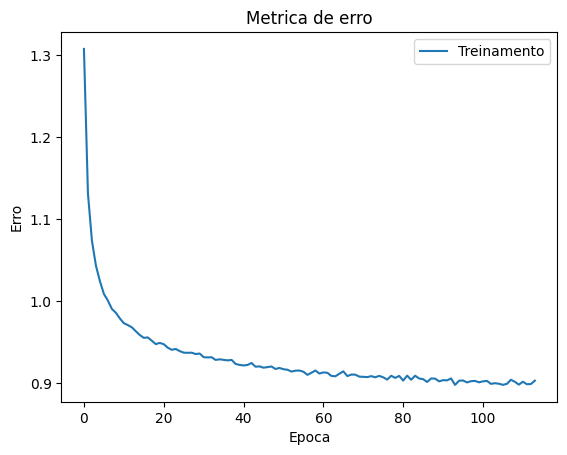


--> Acuracia (treino): 0.5863
--> Acuracia (teste): 0.5600
--> E_out - E_in = 0.0454
--> acc_train - acc_test = 0.0264


In [ ]:
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

E_in, acc_train = model.evaluate(X_train, y_train_ohe, batch_size=BATCH_SIZE, verbose=0)

E_out, acc_test = model.evaluate(X_test, y_test_ohe, batch_size=BATCH_SIZE, verbose=0)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - E_in:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

## 3.3 DecisionTree e RandomForest

### 3.3.1 Árvore de decisão simples

In [ ]:
RANDOM_STATE = 32

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_val, clf.predict(X_val))))
print(classification_report(y_val, clf.predict(X_val)))

Ein: 0.0000
Eout: 0.5349
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       698
           1       0.36      0.37      0.36       683
           2       0.56      0.53      0.54       866

    accuracy                           0.47      2247
   macro avg       0.46      0.46      0.46      2247
weighted avg       0.47      0.47      0.47      2247



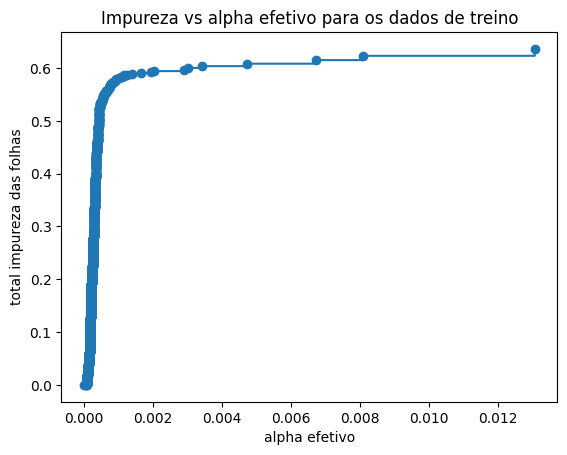

In [ ]:
#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

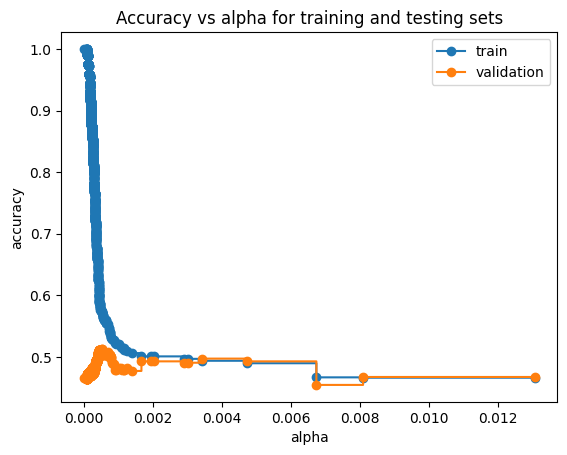

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

# Critério: score de validação - penalização pela diferença treino/validação
generalization_gap = np.abs(train_scores - val_scores)
score_adjusted = val_scores - generalization_gap

# Pegar os índices dos 3 maiores valores de score_adjusted
top3_idx = np.argsort(score_adjusted)[-3:][::-1]  # ordena crescente → pega últimos 3 → inverte p/ decrescente

print("=== Top 3 melhores alphas ===")
for rank, idx in enumerate(top3_idx, start=1):
    alpha = ccp_alphas[idx]
    print(f"#{rank}: alpha={alpha:.6f}, "
          f"Val={val_scores[idx]:.4f}, "
          f"Train={train_scores[idx]:.4f}, "
          f"Gap={generalization_gap[idx]:.4f}, "
          f"Score Ajustado={score_adjusted[idx]:.4f}")

=== Top 3 melhores alphas ===
#1: alpha=0.003426, Val=0.4971, Train=0.4936, Gap=0.0035, Score Ajustado=0.4936
#2: alpha=0.004721, Val=0.4927, Train=0.4896, Gap=0.0031, Score Ajustado=0.4896
#3: alpha=0.002040, Val=0.4927, Train=0.5007, Gap=0.0081, Score Ajustado=0.4846



Árvore com poda (alpha=0.003426)
Ein: 0.5056
Eout: 0.5073
              precision    recall  f1-score   support

           0       0.48      0.62      0.54       903
           1       0.34      0.05      0.09       834
           2       0.52      0.73      0.61      1072

    accuracy                           0.49      2809
   macro avg       0.45      0.47      0.41      2809
weighted avg       0.45      0.49      0.43      2809


Árvore com poda (alpha=0.004721)
Ein: 0.5100
Eout: 0.5105
              precision    recall  f1-score   support

           0       0.48      0.62      0.54       903
           1       0.00      0.00      0.00       834
           2       0.50      0.76      0.60      1072

    accuracy                           0.49      2809
   macro avg       0.33      0.46      0.38      2809
weighted avg       0.34      0.49      0.40      2809



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Árvore com poda (alpha=0.002040)
Ein: 0.4952
Eout: 0.4959
              precision    recall  f1-score   support

           0       0.50      0.60      0.54       903
           1       0.37      0.05      0.09       834
           2       0.52      0.78      0.62      1072

    accuracy                           0.50      2809
   macro avg       0.46      0.48      0.42      2809
weighted avg       0.47      0.50      0.44      2809



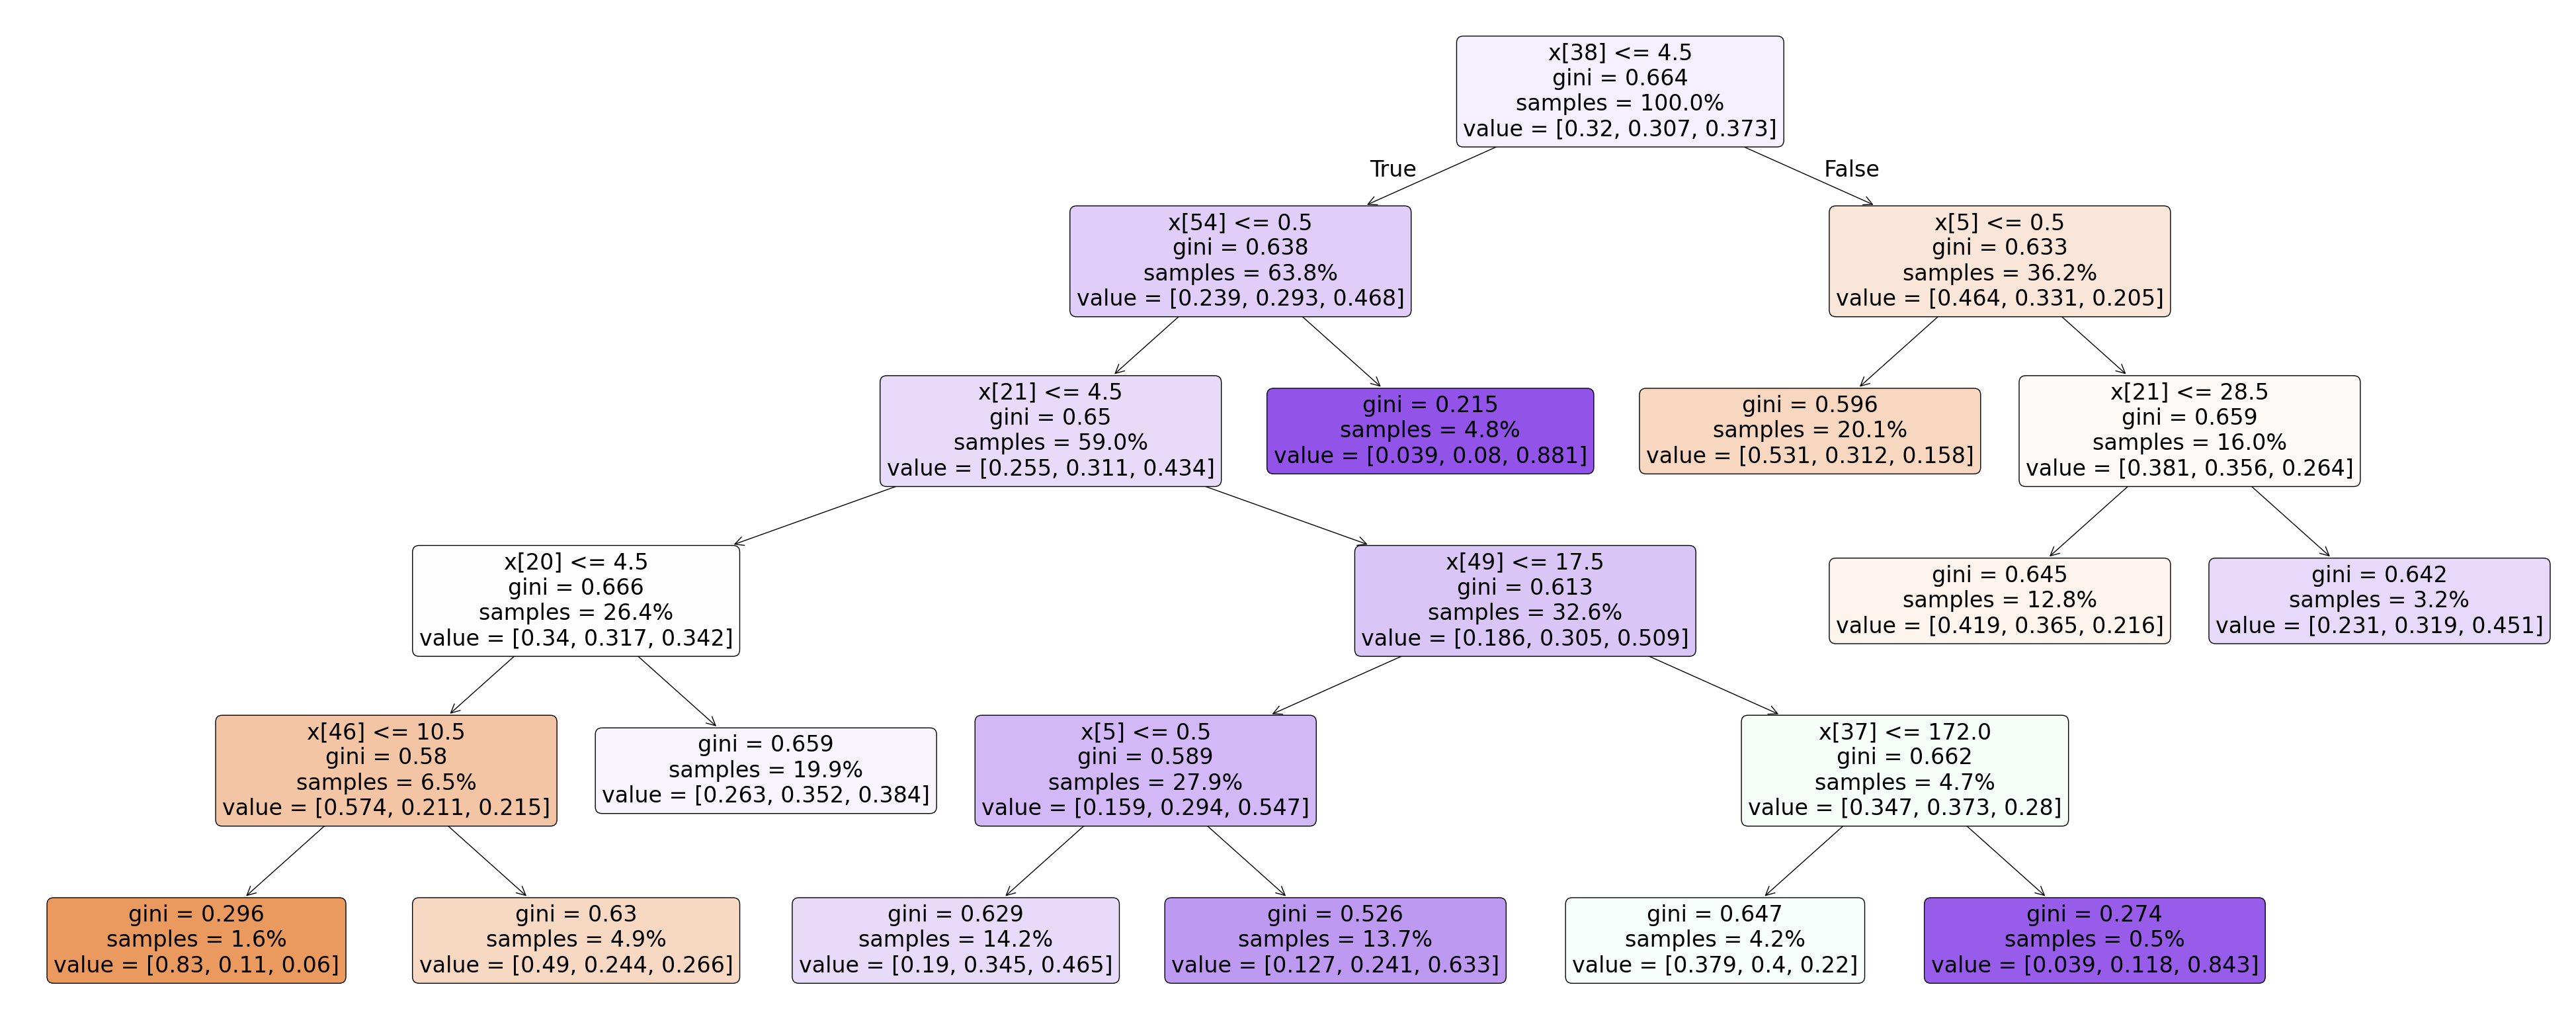

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

best_alphas = [0.003426, 0.004721, 0.002040]

for alpha in best_alphas:
    clf_final = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=alpha)
    clf_final.fit(X_train, y_train)

    print(f"\nÁrvore com poda (alpha={alpha:.6f})")
    print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf_final.predict(X_train))))
    print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf_final.predict(X_test))))
    print(classification_report(y_test, clf_final.predict(X_test)))

### 3.3.2 Árvore de decisão com GridSearch

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

param_grid_tree = {
    'ccp_alpha': best_alphas,
    'max_depth': [3, 5, 7, 10, 15, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

cv_folds = 5
skf_tree = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)

dt_estimator = DecisionTreeClassifier(random_state=RANDOM_STATE)

grid_search_tree = GridSearchCV(
    estimator=dt_estimator,
    param_grid=param_grid_tree,
    cv=skf_tree,
    scoring='accuracy', # Otimiza pela acurácia média da validação cruzada
    verbose=2,
    n_jobs=-1
)

print("Iniciando Grid Search para Árvore de Decisão...")
start_time = time.time()

grid_search_tree.fit(X_train_np, y_train_np)

end_time = time.time()
print(f"Grid Search concluído em {end_time - start_time:.2f} segundos.")

Iniciando Grid Search para Árvore de Decisão...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Grid Search concluído em 88.92 segundos.


In [ ]:
best_tree = grid_search_tree.best_estimator_
best_score = grid_search_tree.best_score_

print("\n" + "="*70)
print("MELHORES PARÂMETROS ENCONTRADOS (Média Validação Cruzada):")
print(f"Melhores Parâmetros: {grid_search_tree.best_params_}")
print(f"Média Acurácia de Validação ({cv_folds} Folds): {best_score:.4f}")
print("="*70)


MELHORES PARÂMETROS ENCONTRADOS (Média Validação Cruzada):
Melhores Parâmetros: {'ccp_alpha': 0.00204, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
Média Acurácia de Validação (5 Folds): 0.5103



Desempenho da Árvore de Decisão Final
Ein (Erro de treino): 0.4833
Eout (Erro de teste): 0.4831

Relatório de classificação (Teste):
              precision    recall  f1-score   support

           0       0.51      0.63      0.56       903
           1       0.38      0.05      0.08       834
           2       0.53      0.79      0.63      1072

    accuracy                           0.52      2809
   macro avg       0.47      0.49      0.43      2809
weighted avg       0.48      0.52      0.45      2809



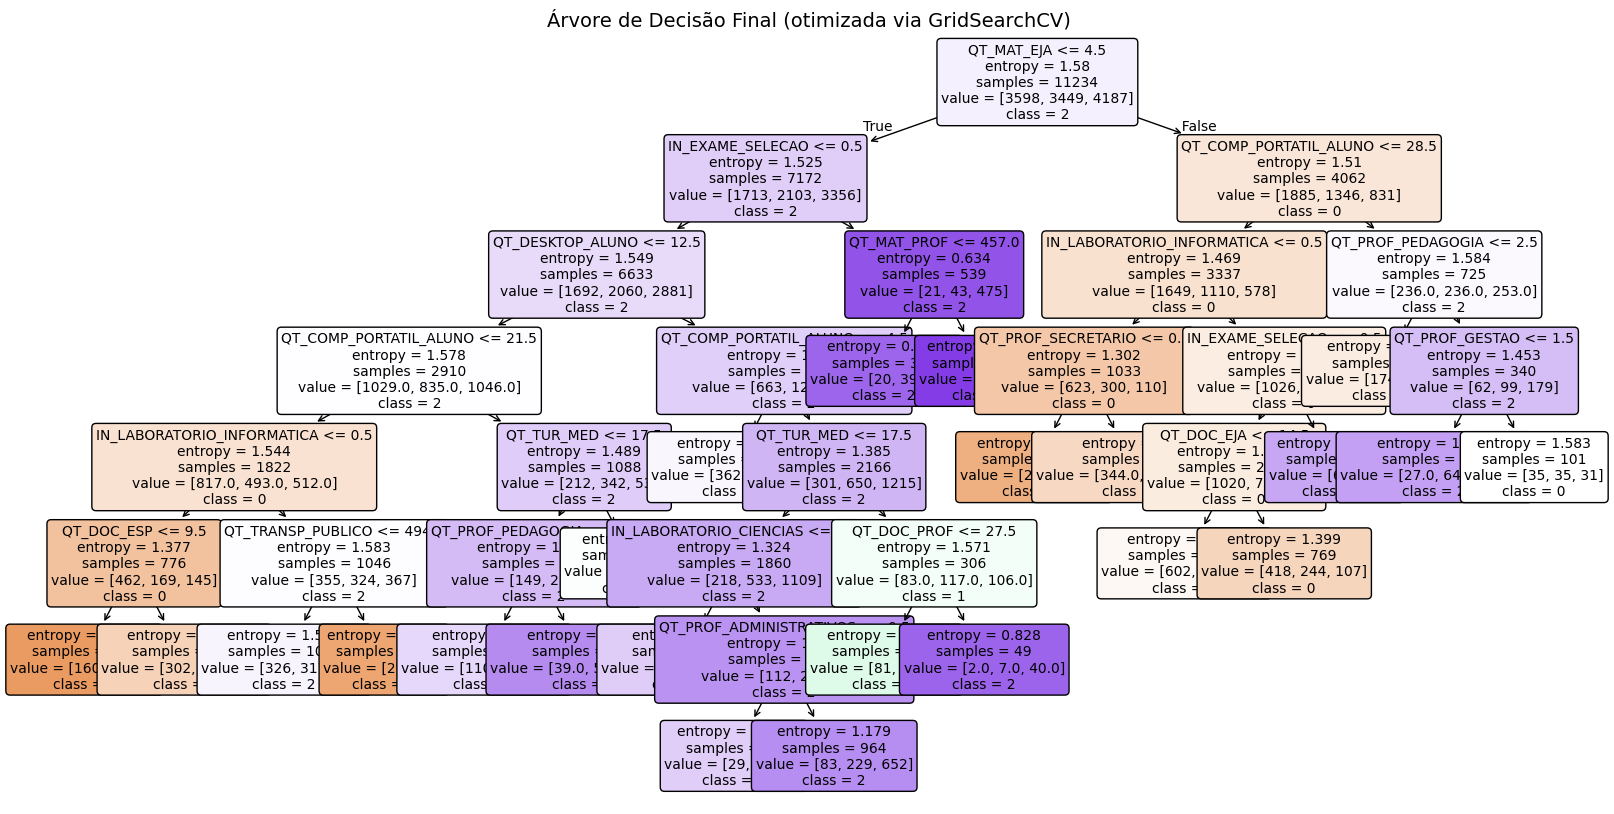

In [ ]:
y_pred_train = best_tree.predict(X_train_np)
y_pred_test = best_tree.predict(np.array(X_test))

print("\n" + "="*70)
print("Desempenho da Árvore de Decisão Final")
print(f"Ein (Erro de treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (Erro de teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("="*70)

print("\nRelatório de classificação (Teste):")
print(classification_report(y_test, y_pred_test))

plt.figure(figsize=(20,10))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão Final (otimizada via GridSearchCV)", fontsize=14)
plt.show()

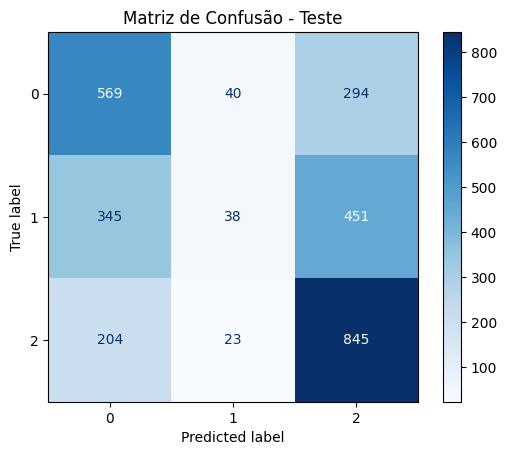

Profundidade da árvore final: 7
Número de folhas: 23


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste")
plt.show()

print(f"Profundidade da árvore final: {best_tree.get_depth()}")
print(f"Número de folhas: {best_tree.get_n_leaves()}")

### 3.3.3 RandomForest simples

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

rf = RandomForestClassifier(n_estimators = 50, max_depth = 20)

rf.fit(X_train, y_train)

print(f"Ein (Erro treino): {1 - accuracy_score(y_train, rf.predict(X_train)):.4f}")
print(f"Eout (Erro teste): {1 - accuracy_score(y_test, rf.predict(X_test)):.4f}")
print("="*70)
print("\nRelatório de classificação (Teste):")
print(classification_report(y_test, rf.predict(X_test)))

Ein (Erro treino): 0.0025
Eout (Erro teste): 0.4532

Relatório de classificação (Teste):
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       903
           1       0.38      0.28      0.32       834
           2       0.60      0.71      0.65      1072

    accuracy                           0.55      2809
   macro avg       0.52      0.53      0.52      2809
weighted avg       0.53      0.55      0.53      2809



### 3.3.4 RandomForest com GridSearch

In [ ]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

n_estimators_list = [20, 50, 100, 150]
max_depth_list = [7, 12, 20, None]
max_features_list = ['sqrt', 'log2', None]

param_grid_rf = {
    'n_estimators': n_estimators_list,
    'max_depth': max_depth_list,
    'max_features': max_features_list
} # 3 * 4 * 3 = 36 combinações

cv_folds = 5
skf_rf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)

rf_estimator = RandomForestClassifier(random_state=RANDOM_STATE)

grid_search_rf = GridSearchCV(
    estimator=rf_estimator,
    param_grid=param_grid_rf,
    cv=skf_rf,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [ ]:
print("\n" + "="*70)
print(f"Iniciando Grid Search para Random Forest ({len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['max_features'])} combinações x {cv_folds} Folds)...")
start_time = time.time()

# Treina e otimiza o Random Forest no conjunto de treino
grid_search_rf.fit(X_train_np, y_train_np)

end_time = time.time()
print(f"Grid Search concluído em {end_time - start_time:.2f} segundos.")


Iniciando Grid Search para Random Forest (48 combinações x 5 Folds)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid Search concluído em 1010.98 segundos.


In [ ]:
best_rf_score = grid_search_rf.best_score_ # Acurácia média da validação cruzada
best_rf_params = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_ # Melhor modelo otimizado

print("\n" + "="*70)
print("MELHOR MODELO RANDOM FOREST OTIMIZADO")
print(f"Média Acurácia de Validação ({cv_folds} Folds): {best_rf_score:.4f}")
print("Melhores Parâmetros Encontrados:")
print(f"  - n_estimators: {best_rf_params['n_estimators']}")
print(f"  - max_depth: {best_rf_params['max_depth']}")
print(f"  - max_features: {best_rf_params['max_features']}")
print("="*70)


MELHOR MODELO RANDOM FOREST OTIMIZADO
Média Acurácia de Validação (5 Folds): 0.5585
Melhores Parâmetros Encontrados:
  - n_estimators: 150
  - max_depth: None
  - max_features: log2


In [ ]:
# AVALIAR NO TESTE
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

print("\nDesempenho do Random Forest Final")
print(f"Ein (Erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (Erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("\nRelatório de classificação (Teste):")
print(classification_report(y_test, y_pred_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Desempenho do Random Forest Final
Ein (Erro treino): 0.0000
Eout (Erro teste): 0.4418

Relatório de classificação (Teste):
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       903
           1       0.39      0.25      0.31       834
           2       0.61      0.73      0.66      1072

    accuracy                           0.56      2809
   macro avg       0.53      0.54      0.53      2809
weighted avg       0.54      0.56      0.54      2809



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


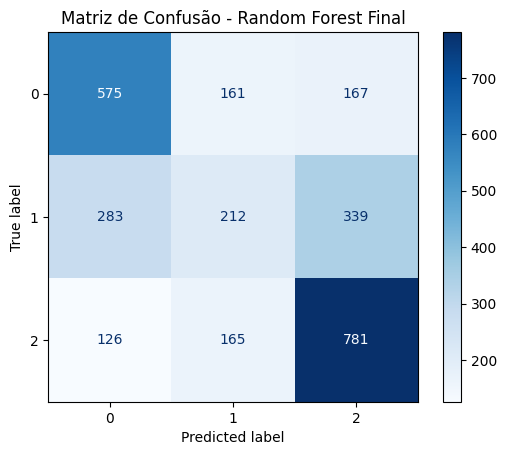

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Matriz de Confusão - Random Forest Final")
plt.show()

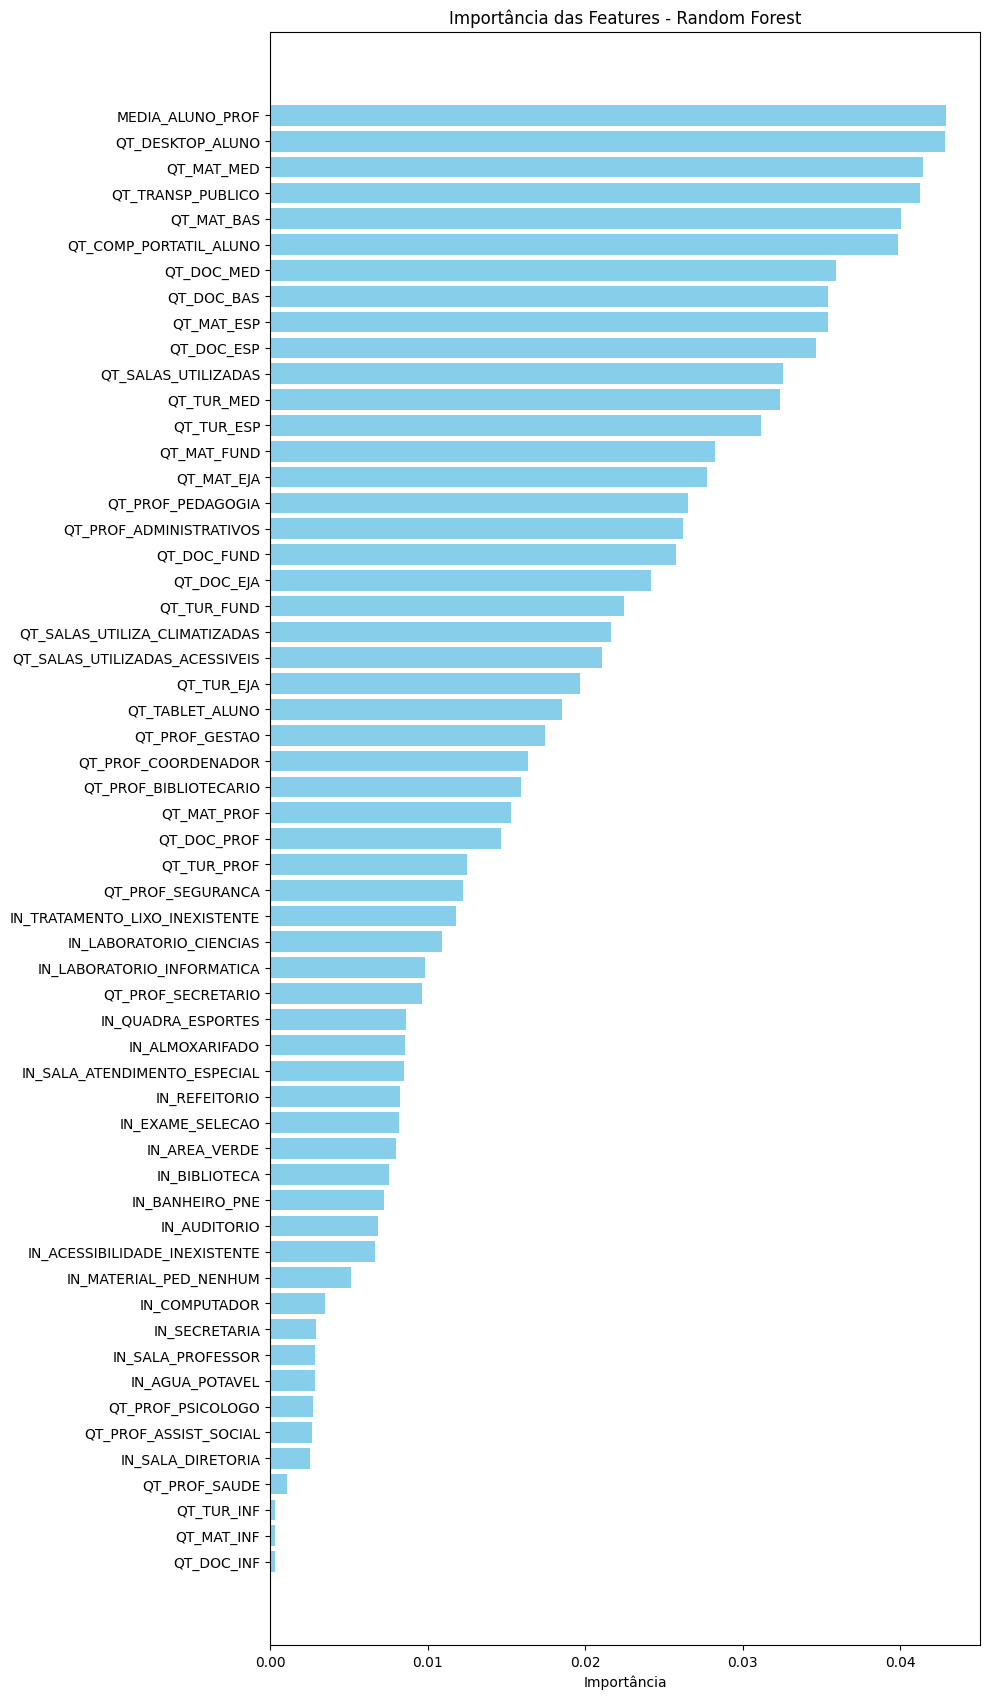

In [ ]:
importances = best_rf_model.feature_importances_
features = X.columns

# Ordena por importância
indices = np.argsort(importances)
sorted_importances = importances[indices]
sorted_features = features[indices]

# Plot horizontal
plt.figure(figsize=(10, len(features)*0.3))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Importância")
plt.title("Importância das Features - Random Forest")
plt.tight_layout()
plt.show()

## 3.4 Construindo SVM

### 3.4.1 SVM simples

In [ ]:
RANDOM_STATE = 16

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='rbf', random_state=RANDOM_STATE)
model.fit(X_train, y_train)

print("#VS: " + str(model.n_support_))
print(model.support_vectors_)

#VS: [2987 3351 3093]
[[-4.3699658   0.77433927  0.56275226 ... -0.2472098  -0.63514725
   0.72380048]
 [ 0.22883474  0.77433927  0.56275226 ... -0.2472098   0.89487128
   1.47163757]
 [-4.3699658   0.77433927 -1.77698086 ... -0.2472098  -0.10659539
  -0.42138685]
 ...
 [ 0.22883474  0.77433927  0.56275226 ... -0.2472098  -0.37921688
  -1.18751451]
 [ 0.22883474 -1.29142358 -1.77698086 ... -0.2472098  -0.39590799
  -0.60165218]
 [ 0.22883474 -1.29142358  0.56275226 ... -0.2472098  -0.70747539
  -0.02177874]]


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"Ein (erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print(f"Acurácia (treino): {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Acurácia (teste): {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Total de vetores de suporte: {len(model.support_)}")

print("\nClassification Report (teste):")
print(classification_report(y_test, y_pred_test, digits=4))

Ein (erro treino): 0.3461
Eout (erro teste): 0.4439
Acurácia (treino): 0.6539
Acurácia (teste): 0.5561
Total de vetores de suporte: 9431

Classification Report (teste):
              precision    recall  f1-score   support

           0     0.5472    0.6410    0.5904       869
           1     0.4438    0.2533    0.3225       904
           2     0.6086    0.7490    0.6716      1036

    accuracy                         0.5561      2809
   macro avg     0.5332    0.5478    0.5282      2809
weighted avg     0.5366    0.5561    0.5341      2809



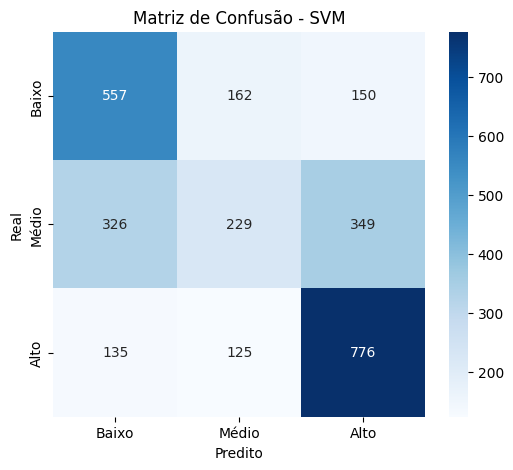

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo","Médio","Alto"], yticklabels=["Baixo","Médio","Alto"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

### 3.4.2 SVM com GridSearch

In [ ]:
param_grid = [
    {"kernel": ["linear"], "C": [0.1, 1, 10, 50]},
    {"kernel": ["rbf"], "C": [0.1, 1, 10, 50], "gamma": ["scale", "auto", 0.001, 0.01]},
    {"kernel": ["poly"], "C": [0.1, 1, 10, 50], "gamma": ["scale", "auto", 0.001, 0.01], "degree": [2, 3]}
]

svm_clf = SVC(random_state=RANDOM_STATE)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    cv=cv_folds,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

print("\nIniciando GridSearch para SVM...")
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

print(f"GridSearch concluído em {end_time - start_time:.2f} segundos.")


Iniciando GridSearch para SVM...
Fitting 5 folds for each of 52 candidates, totalling 260 fits
GridSearch concluído em 5027.94 segundos.


In [ ]:
print("\nMelhores hiperparâmetros encontrados:")
print(grid.best_params_)


Melhores hiperparâmetros encontrados:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

print(f"Ein (erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report (teste):")
print(classification_report(y_test, y_pred_test, digits=4))

Ein (erro treino): 0.3461
Eout (erro teste): 0.4439

Classification Report (teste):
              precision    recall  f1-score   support

           0     0.5472    0.6410    0.5904       869
           1     0.4438    0.2533    0.3225       904
           2     0.6086    0.7490    0.6716      1036

    accuracy                         0.5561      2809
   macro avg     0.5332    0.5478    0.5282      2809
weighted avg     0.5366    0.5561    0.5341      2809



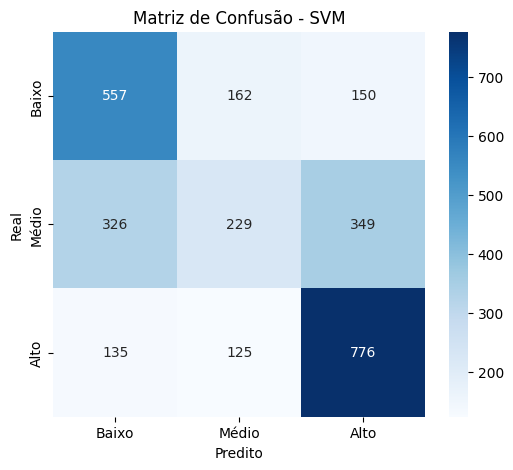

Total de vetores de suporte: 9431


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo","Médio","Alto"], yticklabels=["Baixo","Médio","Alto"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

best_model = grid.best_estimator_
print(f"Total de vetores de suporte: {len(best_model.support_)}")

# 4. Modelos aplicados ao teste

## 4.1 Rede Neural


--- Treinando Fold 1/6 ---
Epoch 127: early stopping
Restoring model weights from the end of the best epoch: 107.


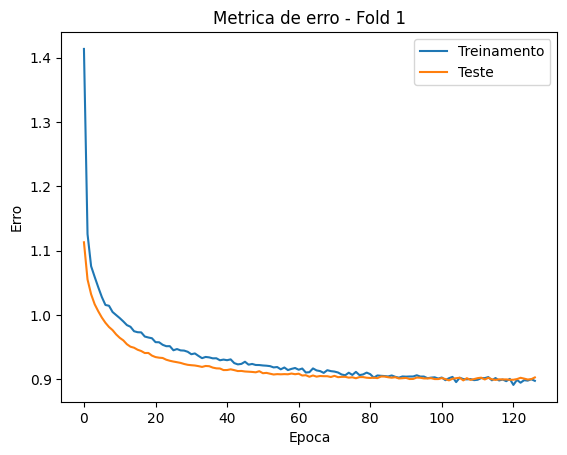

--> Acuracia (treino): 0.5870
--> Acuracia (teste): 0.5728
--> E_out - E_in = 0.0247
--> acc_in - acc_out = 0.0142


--- Treinando Fold 2/6 ---
Epoch 115: early stopping
Restoring model weights from the end of the best epoch: 95.


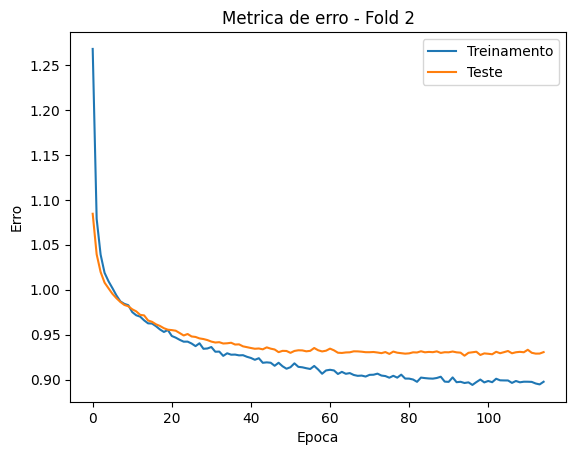

--> Acuracia (treino): 0.5934
--> Acuracia (teste): 0.5498
--> E_out - E_in = 0.0545
--> acc_in - acc_out = 0.0436


--- Treinando Fold 3/6 ---
Epoch 113: early stopping
Restoring model weights from the end of the best epoch: 93.


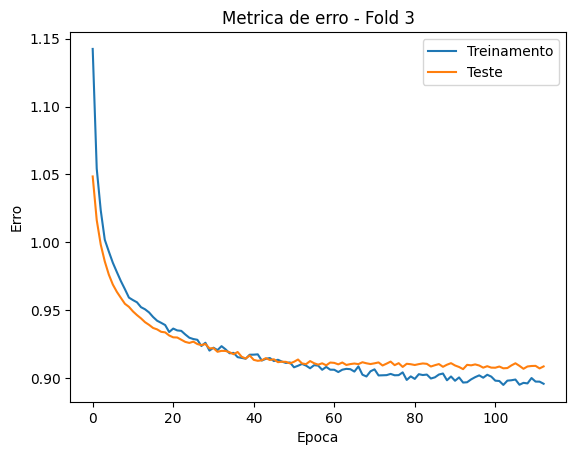

--> Acuracia (treino): 0.5914
--> Acuracia (teste): 0.5711
--> E_out - E_in = 0.0338
--> acc_in - acc_out = 0.0203


--- Treinando Fold 4/6 ---
Epoch 145: early stopping
Restoring model weights from the end of the best epoch: 125.


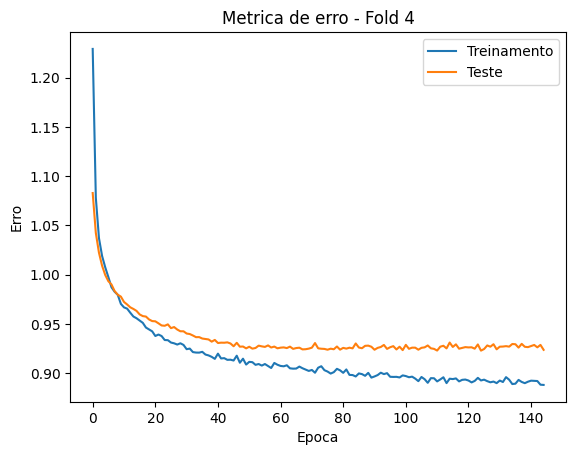

--> Acuracia (treino): 0.5967
--> Acuracia (teste): 0.5440
--> E_out - E_in = 0.0585
--> acc_in - acc_out = 0.0527


--- Treinando Fold 5/6 ---
Epoch 107: early stopping
Restoring model weights from the end of the best epoch: 87.


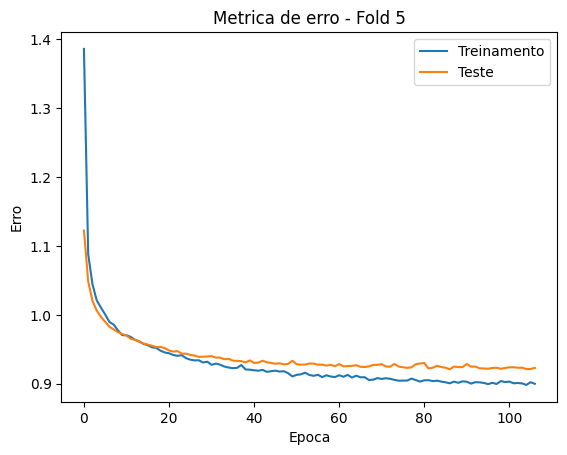

--> Acuracia (treino): 0.5855
--> Acuracia (teste): 0.5701
--> E_out - E_in = 0.0420
--> acc_in - acc_out = 0.0154


--- Treinando Fold 6/6 ---
Epoch 100: early stopping
Restoring model weights from the end of the best epoch: 80.


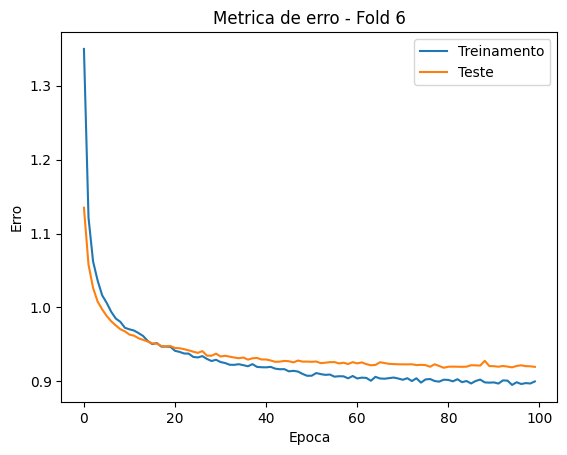

--> Acuracia (treino): 0.5863
--> Acuracia (teste): 0.5581
--> E_out - E_in = 0.0442
--> acc_in - acc_out = 0.0281


✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)
Média Acuracia (treino): 0.5900 (+/- 0.0041)
Média Acuracia (teste): 0.5610 (+/- 0.0112)
Média Erro de Generalização (E_out - E_in): 0.0429


In [ ]:
X_np = np.array(X)
y_np = np.array(y)

es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_test = []
history_list = []
ein_list = []
eout_list = []
i = 0

for train_index, test_index in skf.split(X_np, y_np):
    i = i + 1
    print(f"\n--- Treinando Fold {i}/6 ---")

    X_train_fold, X_test_fold = X_np[train_index], X_np[test_index]
    y_train_fold, y_test_fold = y_np[train_index], y_np[test_index]

    X_train_fold_df = pd.DataFrame(X_train_fold, columns=X.columns)
    X_test_fold_df   = pd.DataFrame(X_test_fold, columns=X.columns)

    scaler = StandardScaler()
    X_train_fold_df.loc[:, cols_numericas] = scaler.fit_transform(X_train_fold_df[cols_numericas])
    X_test_fold_df.loc[:, cols_numericas] = scaler.transform(X_test_fold_df[cols_numericas])

    X_train_fold = X_train_fold_df.values
    X_test_fold = X_test_fold_df.values

    y_train_ohe = to_categorical(y_train_fold, num_classes=N_CLASSES)
    y_test_ohe = to_categorical(y_test_fold, num_classes=N_CLASSES)

    model = Sequential()
    model.add(Input(shape=(d,)))

    model.add(Dense(15, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(N_CLASSES, kernel_initializer='he_normal', activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    history = model.fit(
        X_train_fold, y_train_ohe,
        validation_data=(X_test_fold, y_test_ohe),
        epochs=200,
        batch_size=BATCH_SIZE,
        callbacks=[es_callback],
        verbose=0
    )
    history_list.append(history)

    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_ohe, batch_size=BATCH_SIZE, verbose=0)
    E_out, accuracy_test = model.evaluate(X_test_fold, y_test_ohe, batch_size=BATCH_SIZE, verbose=0)

    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)
    ein_list.append(E_in)
    eout_list.append(E_out)

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Teste'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (teste): {accuracy_test:.4f}')
    print(f"--> E_out - E_in = {E_out - E_in:.4f}")
    print(f"--> acc_in - acc_out = {accuracy_train - accuracy_test:.4f}\n")

avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_test = np.mean(accuracies_test)
avg_ein = np.mean(ein_list)
avg_eout = np.mean(eout_list)

print("\n" + "="*70)
print("✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)")
print(f"Média Acuracia (treino): {avg_accuracy_train:.4f} (+/- {np.std(accuracies_train):.4f})")
print(f"Média Acuracia (teste): {avg_accuracy_test:.4f} (+/- {np.std(accuracies_test):.4f})")
print(f"Média Erro de Generalização (E_out - E_in): {avg_eout - avg_ein:.4f}")
print("="*70)

## 4.2 Teste RandomForest

In [ ]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

print("\nDesempenho do Random Forest Final")
print(f"Ein (Erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (Erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("\nRelatório de classificação (Teste):")
print(classification_report(y_test, y_pred_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Desempenho do Random Forest Final
Ein (Erro treino): 0.0000
Eout (Erro teste): 0.4418

Relatório de classificação (Teste):
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       903
           1       0.39      0.25      0.31       834
           2       0.61      0.73      0.66      1072

    accuracy                           0.56      2809
   macro avg       0.53      0.54      0.53      2809
weighted avg       0.54      0.56      0.54      2809



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## 4.3 Teste SVM

In [ ]:
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

print(f"Ein (erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report (teste):")
print(classification_report(y_test, y_pred_test, digits=4))
print(f"Total de vetores de suporte: {len(best_model.support_)}")

Ein (erro treino): 0.3461
Eout (erro teste): 0.4439

Classification Report (teste):
              precision    recall  f1-score   support

           0     0.5472    0.6410    0.5904       869
           1     0.4438    0.2533    0.3225       904
           2     0.6086    0.7490    0.6716      1036

    accuracy                         0.5561      2809
   macro avg     0.5332    0.5478    0.5282      2809
weighted avg     0.5366    0.5561    0.5341      2809

Total de vetores de suporte: 9431


# 5. Testando separar em duas categorias

In [ ]:
df_final2 = df_final.copy()
print(df_final2.shape)

(14043, 65)


In [ ]:
quartiles = df_final2['VL_OBSERVADO_2023'].quantile([0.25, 0.5, 0.75])

print("Quartis de VL_OBSERVADO_2023:")
print(quartiles)

Quartis de VL_OBSERVADO_2023:
0.20    3.7
0.25    3.8
0.33    4.0
0.40    4.1
0.50    4.2
0.60    4.4
0.66    4.5
0.75    4.7
0.80    4.8
Name: VL_OBSERVADO_2023, dtype: float64


In [ ]:
bins = [0.0, 4.3, 10.0]
labels = [0, 1]

df_final2["CLASSE_IDEB"] = pd.cut(
    df_final["VL_OBSERVADO_2023"],
    bins=bins,
    right = False
)

df_final2["CLASSE_IDEB"] = df_final2["CLASSE_IDEB"].cat.codes

In [ ]:
df_final2["CLASSE_IDEB"].value_counts()

CLASSE_IDEB
0    7074
1    6969
Name: count, dtype: int64

In [ ]:
df_final2['MEDIA_SALA_ALUNO'] = df_final2['QT_MAT_BAS'] / df_final2['QT_SALAS_UTILIZADAS']
display(df_final2[['QT_MAT_BAS', 'QT_SALAS_UTILIZADAS', 'MEDIA_SALA_ALUNO']].head())

QT_MAT_BAS  QT_SALAS_UTILIZADAS  MEDIA_SALA_ALUNO
0       649.0                 32.0         20.281250
1       305.0                 16.0         19.062500
2       733.0                 20.0         36.650000
3      1363.0                 23.0         59.260870
4      1486.0                 21.0         70.761905

In [ ]:
df_final2['RATIO_ALUNO_PROF_APOIO'] = df_final2['QT_MAT_BAS'] / (
    df_final2['QT_PROF_ADMINISTRATIVOS'] +
    df_final2['QT_PROF_BIBLIOTECARIO'] +
    df_final2['QT_PROF_SAUDE'] +
    df_final2['QT_PROF_COORDENADOR'] +
    df_final2['QT_PROF_PSICOLOGO'] +
    df_final2['QT_PROF_PEDAGOGIA'] +
    df_final2['QT_PROF_SECRETARIO'] +
    df_final2['QT_PROF_SEGURANCA'] +
    df_final2['QT_PROF_GESTAO'] +
    df_final2['QT_PROF_ASSIST_SOCIAL']
)

df_final2['RATIO_ALUNO_PROF_APOIO'] = df_final2['RATIO_ALUNO_PROF_APOIO'].replace([np.inf, -np.inf], np.nan).fillna(0)

display(df_final2[[
    'QT_MAT_BAS',
    'QT_PROF_ADMINISTRATIVOS',
    'QT_PROF_BIBLIOTECARIO',
    'QT_PROF_SAUDE',
    'QT_PROF_COORDENADOR',
    'QT_PROF_PSICOLOGO',
    'QT_PROF_PEDAGOGIA',
    'QT_PROF_SECRETARIO',
    'QT_PROF_SEGURANCA',
    'QT_PROF_GESTAO',
    'QT_PROF_ASSIST_SOCIAL',
    'RATIO_ALUNO_PROF_APOIO'
]].head())

QT_MAT_BAS  QT_PROF_ADMINISTRATIVOS  QT_PROF_BIBLIOTECARIO  QT_PROF_SAUDE  \
0       649.0                      3.0                    1.0            0.0   
1       305.0                      5.0                    1.0            0.0   
2       733.0                      4.0                    1.0            0.0   
3      1363.0                      8.0                    2.0            0.0   
4      1486.0                      7.0                    7.0            0.0   

   QT_PROF_COORDENADOR  QT_PROF_PSICOLOGO  QT_PROF_PEDAGOGIA  \
0                  0.0                0.0               14.0   
1                  0.0                0.0                2.0   
2                  6.0                0.0                4.0   
3                  6.0                1.0                0.0   
4                  7.0                1.0                8.0   

   QT_PROF_SECRETARIO  QT_PROF_SEGURANCA  QT_PROF_GESTAO  \
0                 1.0                0.0             2.0   
1                 1.0                2.0             0.0   
2                 1.0                3.0             1.0   
3                 1.0                0.0             1.0   
4                 1.0                4.0             1.0   

   QT_PROF_ASSIST_SOCIAL  RATIO_ALUNO_PROF_APOIO  
0                    0.0               30.904762  
1                    0.0               27.727273  
2                    0.0               36.650000  
3                    3.0               61.954545  
4                    0.0               41.277778

In [ ]:
X = df_final2.drop(columns=["ID_ESCOLA", "NO_ENTIDADE", "SG_UF", "VL_OBSERVADO_2023","VL_NOTA_MEDIA_2023","VL_INDICADOR_REND_2023", "PORTE_ESCOLA", "CLASSE_IDEB", 'QT_PROF_ADMINISTRATIVOS',
                            'QT_PROF_BIBLIOTECARIO', 'QT_PROF_SAUDE', 'QT_PROF_COORDENADOR', 'QT_PROF_PSICOLOGO', 'QT_PROF_PEDAGOGIA', 'QT_PROF_SECRETARIO', 'QT_PROF_SEGURANCA', 'QT_PROF_GESTAO',
                            'QT_PROF_ASSIST_SOCIAL', 'QT_TUR_INF', 'QT_DOC_INF', 'QT_MAT_INF', 'IN_COMPUTADOR', 'QT_TUR_EJA', 'QT_MAT_EJA', 'QT_DOC_EJA', 'QT_TUR_ESP', 'QT_MAT_ESP', 'QT_DOC_ESP'])
y = df_final2["CLASSE_IDEB"]
print(X.shape, y.shape)

quant_cols = [col for col in X.columns if col.startswith('QT_')] + ["MEDIA_ALUNO_PROF"] + ["RATIO_ALUNO_PROF_APOIO"]


(14043, 39) (14043,)


## 5.1 Rede Neural

In [ ]:
BATCH_SIZE = 128
RANDOM_STATE = 32

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

scaler = StandardScaler()
X_train.loc[:, quant_cols] = scaler.fit_transform(X_train[quant_cols])
X_val.loc[:, quant_cols] = scaler.transform(X_val[quant_cols])

y_train_ohe = to_categorical(y_train, num_classes=N_CLASSES)
y_val_ohe = to_categorical(y_val, num_classes=N_CLASSES)

N = X_train.shape[0]
d = X_train.shape[1]
n = N / (10 * (d + 1))

print(f"N = {N}")
print(f"d = {d}")
print(f"n = {n}")

N = 8987
d = 39
n = 22.4675


In [ ]:
model = Sequential()
model.add(Input(shape=(d,)))

model.add(Dense(22, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, restore_best_weights=True)

history = model.fit(X_train.astype('float32'), y_train, validation_data=(X_val.astype('float32'), y_val), epochs=200, batch_size=BATCH_SIZE, callbacks=[es])

Model: "sequential_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_575 (Dense)               │ (None, 22)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_294 (Dropout)           │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_576 (Dense)               │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 903 (3.53 KB)

 Trainable params: 903 (3.53 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4939 - loss: 3.4607 - val_accuracy: 0.5447 - val_loss: 0.8138
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5210 - loss: 2.3852 - val_accuracy: 0.5719 - val_loss: 0.7799
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5362 - loss: 1.8254 - val_accuracy: 0.5923 - val_loss: 0.7607
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5426 - loss: 1.4569 - val_accuracy: 0.6262 - val_loss: 0.6808
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5611 - loss: 1.1262 - val_accuracy: 0.6409 - val_loss: 0.6610
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5754 - loss: 0.9562 - val_accuracy: 0.6520 - val_loss: 0.6486
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5941 - loss: 0.8229 - val_accuracy: 0.6551 - val_loss: 0.6447
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6203 - loss: 0.7348 - val_accuracy: 0.66

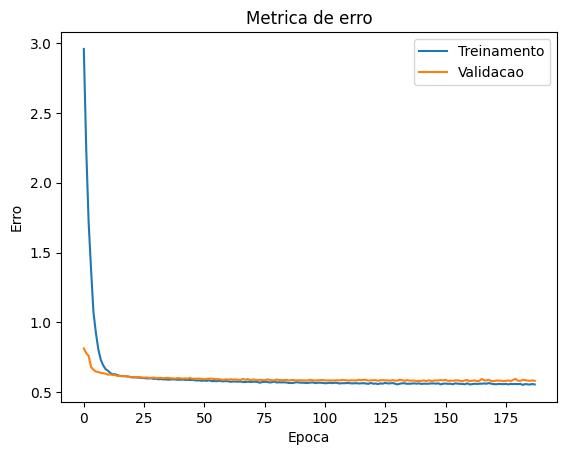

Loss final do Treino: 0.5562
Loss final da Validação: 0.5820


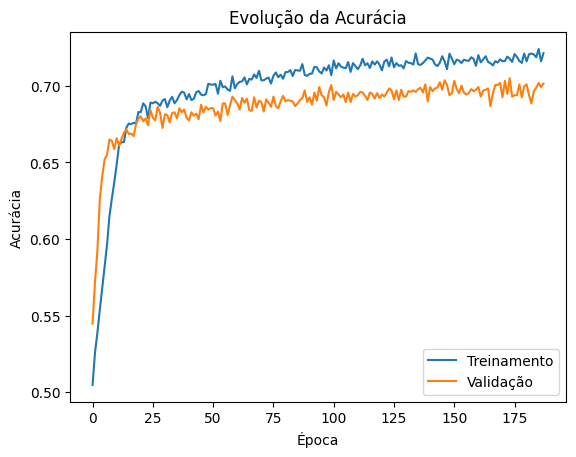

Acurácia final do Treino: 0.7213
Acurácia final da Validação: 0.7014


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Loss final do Treino: {final_train_loss:.4f}")
print(f"Loss final da Validação: {final_val_loss:.4f}")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Evolução da Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.show()

final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Acurácia final do Treino: {final_train_accuracy:.4f}")
print(f"Acurácia final da Validação: {final_val_accuracy:.4f}")



--- Treinando Fold 1/6 ---
Epoch 113: early stopping
Restoring model weights from the end of the best epoch: 93.


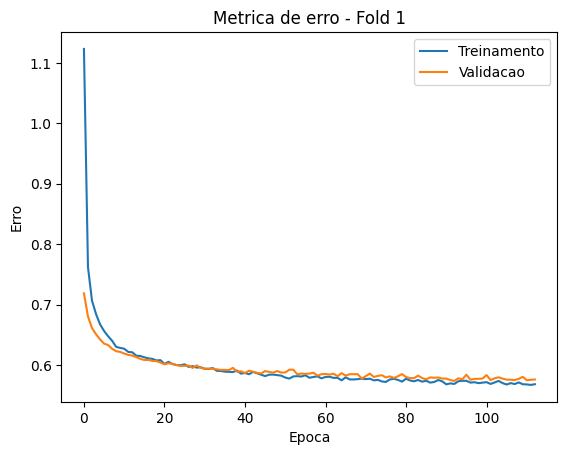

--> Acuracia (treino): 0.7225
--> Acuracia (validacao): 0.7026
--> E_val - E_in = 0.0186
--> acc_in - acc_val = 0.0198


--- Treinando Fold 2/6 ---
Epoch 136: early stopping
Restoring model weights from the end of the best epoch: 116.


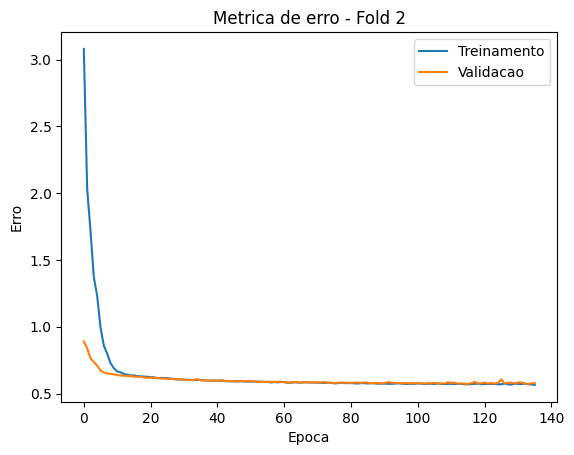

--> Acuracia (treino): 0.7223
--> Acuracia (validacao): 0.7053
--> E_val - E_in = 0.0167
--> acc_in - acc_val = 0.0170


--- Treinando Fold 3/6 ---
Restoring model weights from the end of the best epoch: 191.


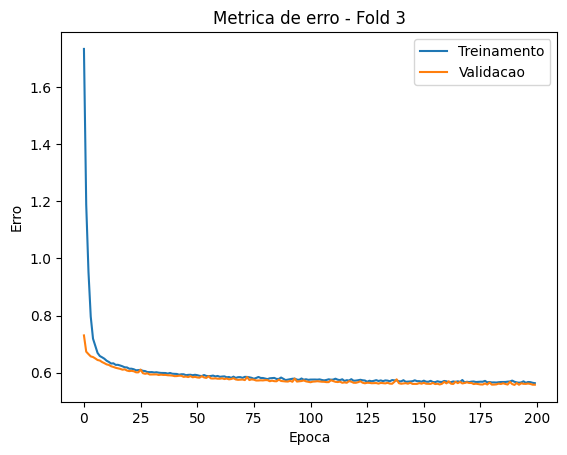

--> Acuracia (treino): 0.7261
--> Acuracia (validacao): 0.7169
--> E_val - E_in = 0.0055
--> acc_in - acc_val = 0.0092


--- Treinando Fold 4/6 ---
Epoch 130: early stopping
Restoring model weights from the end of the best epoch: 110.


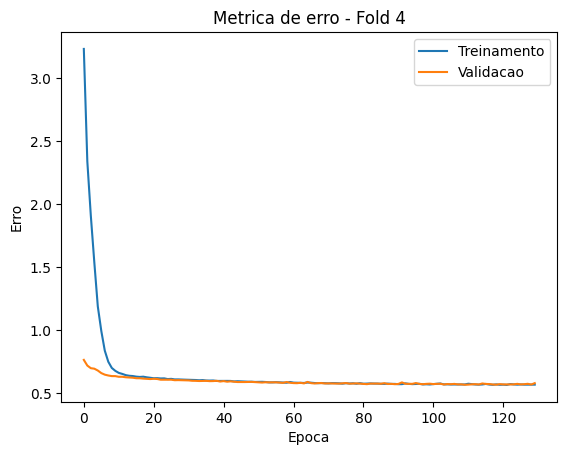

--> Acuracia (treino): 0.7237
--> Acuracia (validacao): 0.7078
--> E_val - E_in = 0.0124
--> acc_in - acc_val = 0.0159


--- Treinando Fold 5/6 ---
Epoch 183: early stopping
Restoring model weights from the end of the best epoch: 163.


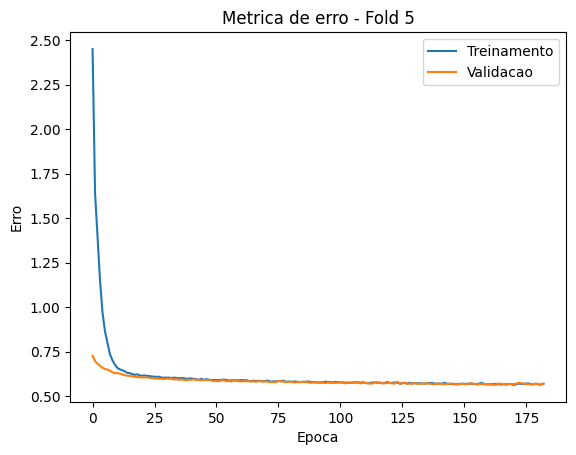

--> Acuracia (treino): 0.7188
--> Acuracia (validacao): 0.7260
--> E_val - E_in = 0.0137
--> acc_in - acc_val = -0.0072


--- Treinando Fold 6/6 ---
Epoch 99: early stopping
Restoring model weights from the end of the best epoch: 79.


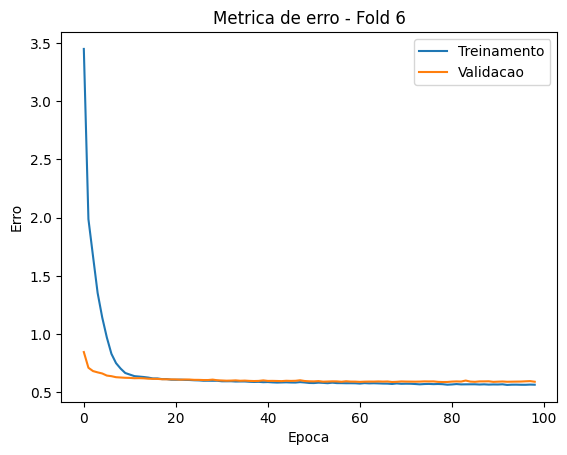

--> Acuracia (treino): 0.7225
--> Acuracia (validacao): 0.7003
--> E_val - E_in = 0.0318
--> acc_in - acc_val = 0.0222


✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)
Média Acuracia (treino): 0.7226 (+/- 0.0022)
Média Acuracia (validacao): 0.7098 (+/- 0.0089)
Média Erro de Generalização (E_val - E_in): 0.0164


In [ ]:
# Com 1 camada escondida
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []
i = 0

for train_index, val_index in skf.split(X_train_np, y_train_np):
    i = i + 1
    print(f"\n--- Treinando Fold {i}/6 ---")

    # Separar dados do Fold
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Criar DataFrames temporários para usar .loc
    X_train_fold_df = pd.DataFrame(X_train_fold, columns=X_train.columns)
    X_val_fold_df   = pd.DataFrame(X_val_fold, columns=X_train.columns)

    scaler = StandardScaler()
    X_train_fold_df.loc[:, quant_cols] = scaler.fit_transform(X_train_fold_df[quant_cols])
    X_val_fold_df.loc[:, quant_cols] = scaler.transform(X_val_fold_df[quant_cols])

    # Converter DataFrames de volta para arrays numpy
    X_train_fold = X_train_fold_df.values
    X_val_fold = X_val_fold_df.values

    model = Sequential()
    model.add(Input(shape=(d,)))

    model.add(Dense(22, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Treina o modelo
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=200,
        batch_size=BATCH_SIZE,
        callbacks=[es_callback],
        verbose=0
    )
    history_list.append(history)

    # Avalia o modelo
    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)

    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

# Cálculo e exibição da média
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

print("\n" + "="*70)
print("✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)")
print(f"Média Acuracia (treino): {avg_accuracy_train:.4f} (+/- {np.std(accuracies_train):.4f})")
print(f"Média Acuracia (validacao): {avg_accuracy_val:.4f} (+/- {np.std(accuracies_val):.4f})")
print(f"Média Erro de Generalização (E_val - E_in): {avg_eval - avg_ein:.4f}")
print("="*70)


--- Treinando Fold 1/6 ---
Epoch 187: early stopping
Restoring model weights from the end of the best epoch: 167.


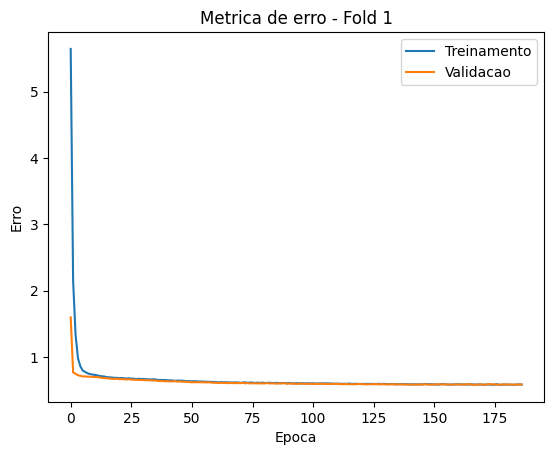

--> Acuracia (treino): 0.7278
--> Acuracia (validacao): 0.7010
--> E_val - E_in = 0.0212
--> acc_in - acc_val = 0.0268


--- Treinando Fold 2/6 ---
Epoch 163: early stopping
Restoring model weights from the end of the best epoch: 143.


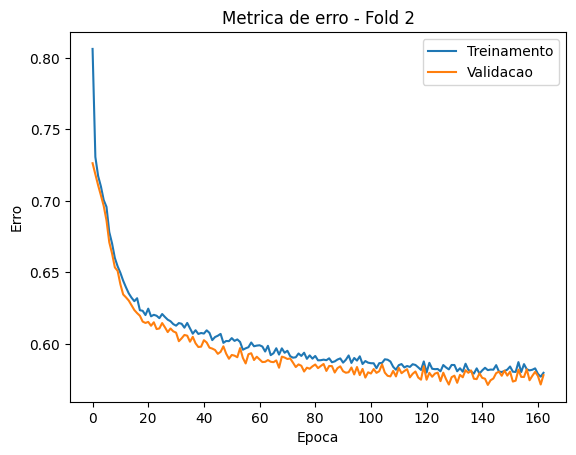

--> Acuracia (treino): 0.7205
--> Acuracia (validacao): 0.7117
--> E_val - E_in = 0.0143
--> acc_in - acc_val = 0.0089


--- Treinando Fold 3/6 ---
Epoch 184: early stopping
Restoring model weights from the end of the best epoch: 164.


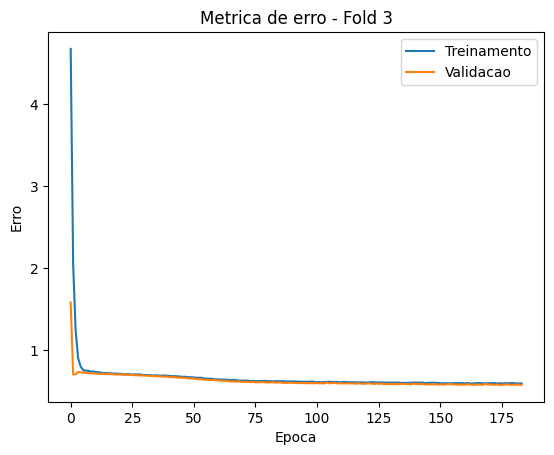

--> Acuracia (treino): 0.7162
--> Acuracia (validacao): 0.7110
--> E_val - E_in = 0.0039
--> acc_in - acc_val = 0.0052


--- Treinando Fold 4/6 ---
Epoch 153: early stopping
Restoring model weights from the end of the best epoch: 133.


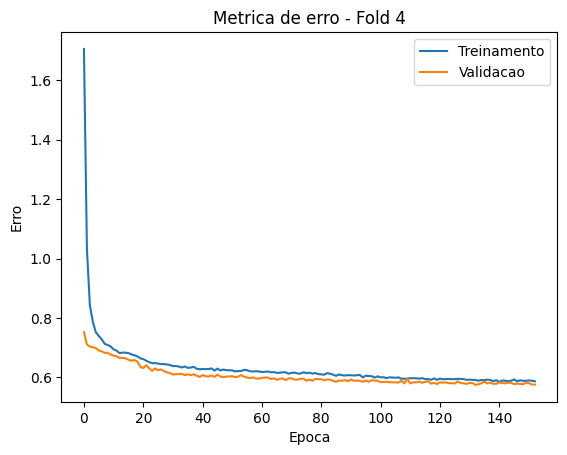

--> Acuracia (treino): 0.7165
--> Acuracia (validacao): 0.7067
--> E_val - E_in = 0.0075
--> acc_in - acc_val = 0.0098


--- Treinando Fold 5/6 ---
Restoring model weights from the end of the best epoch: 197.


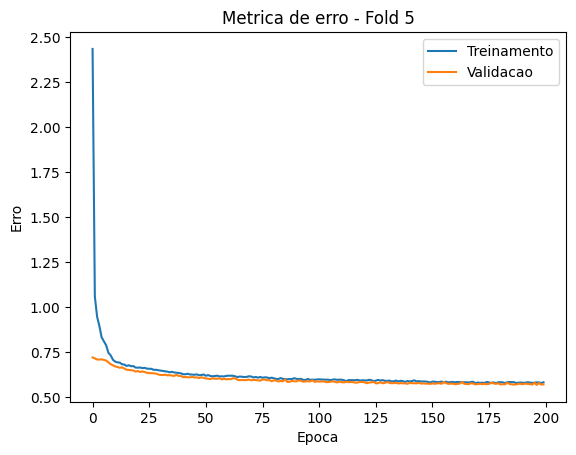

--> Acuracia (treino): 0.7255
--> Acuracia (validacao): 0.7185
--> E_val - E_in = 0.0143
--> acc_in - acc_val = 0.0070


--- Treinando Fold 6/6 ---
Epoch 136: early stopping
Restoring model weights from the end of the best epoch: 116.


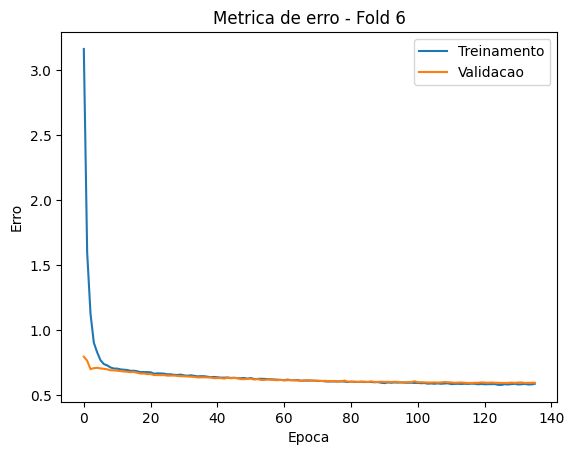

--> Acuracia (treino): 0.7233
--> Acuracia (validacao): 0.6987
--> E_val - E_in = 0.0306
--> acc_in - acc_val = 0.0246


✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)
Média Acuracia (treino): 0.7216 (+/- 0.0043)
Média Acuracia (validacao): 0.7079 (+/- 0.0067)
Média Erro de Generalização (E_val - E_in): 0.0153


In [ ]:
# Com 2 camadas escondidas
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []
i = 0

for train_index, val_index in skf.split(X_train_np, y_train_np):
    i = i + 1
    print(f"\n--- Treinando Fold {i}/6 ---")

    # Separar dados do Fold
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Criar DataFrames temporários para usar .loc
    X_train_fold_df = pd.DataFrame(X_train_fold, columns=X_train.columns)
    X_val_fold_df   = pd.DataFrame(X_val_fold, columns=X_train.columns)

    scaler = StandardScaler()
    X_train_fold_df.loc[:, quant_cols] = scaler.fit_transform(X_train_fold_df[quant_cols])
    X_val_fold_df.loc[:, quant_cols] = scaler.transform(X_val_fold_df[quant_cols])

    # Converter DataFrames de volta para arrays numpy
    X_train_fold = X_train_fold_df.values
    X_val_fold = X_val_fold_df.values

    model = Sequential()
    model.add(Input(shape=(d,)))

    model.add(Dense(12, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=200,
        batch_size=BATCH_SIZE,
        callbacks=[es_callback],
        verbose=0
    )
    history_list.append(history)

    # Avalia o modelo
    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)

    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

# Cálculo e exibição da média
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

print("\n" + "="*70)
print("✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)")
print(f"Média Acuracia (treino): {avg_accuracy_train:.4f} (+/- {np.std(accuracies_train):.4f})")
print(f"Média Acuracia (validacao): {avg_accuracy_val:.4f} (+/- {np.std(accuracies_val):.4f})")
print(f"Média Erro de Generalização (E_val - E_in): {avg_eval - avg_ein:.4f}")
print("="*70)


--- Treinando Fold 1/6 ---
Epoch 161: early stopping
Restoring model weights from the end of the best epoch: 141.


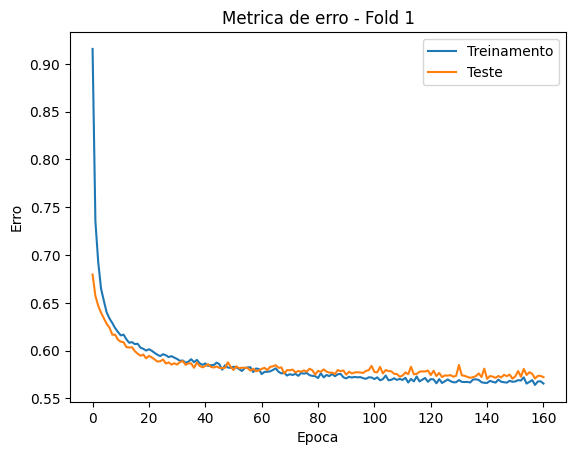

--> Acuracia (treino): 0.7258
--> Acuracia (teste): 0.7108
--> E_out - E_in = 0.0180
--> acc_in - acc_out = 0.0150


--- Treinando Fold 2/6 ---
Restoring model weights from the end of the best epoch: 186.


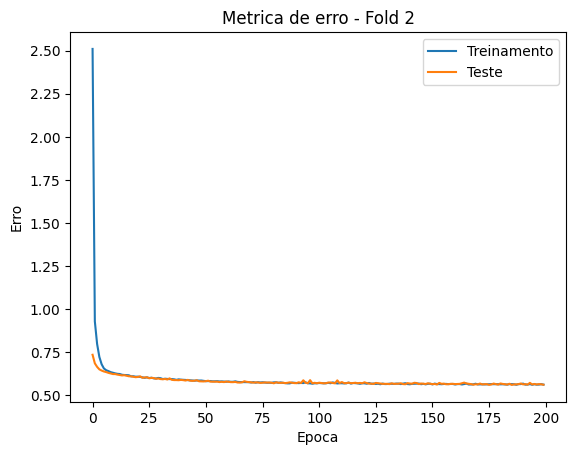

--> Acuracia (treino): 0.7272
--> Acuracia (teste): 0.7159
--> E_out - E_in = 0.0165
--> acc_in - acc_out = 0.0113


--- Treinando Fold 3/6 ---
Epoch 136: early stopping
Restoring model weights from the end of the best epoch: 116.


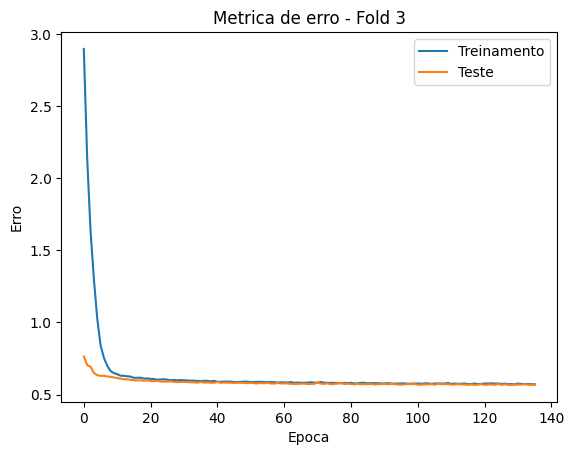

--> Acuracia (treino): 0.7174
--> Acuracia (teste): 0.7117
--> E_out - E_in = 0.0105
--> acc_in - acc_out = 0.0057


--- Treinando Fold 4/6 ---
Epoch 160: early stopping
Restoring model weights from the end of the best epoch: 140.


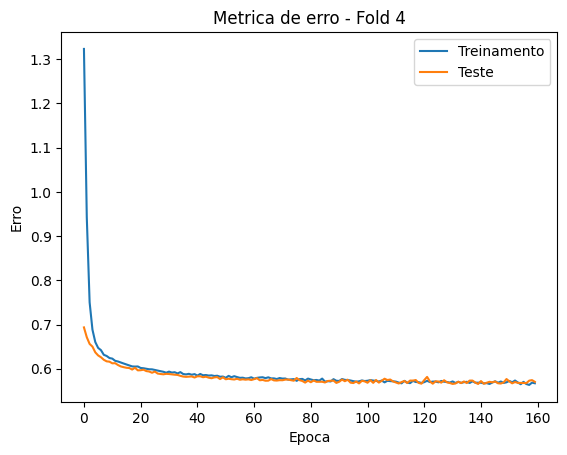

--> Acuracia (treino): 0.7200
--> Acuracia (teste): 0.7179
--> E_out - E_in = 0.0151
--> acc_in - acc_out = 0.0020


--- Treinando Fold 5/6 ---
Epoch 132: early stopping
Restoring model weights from the end of the best epoch: 112.


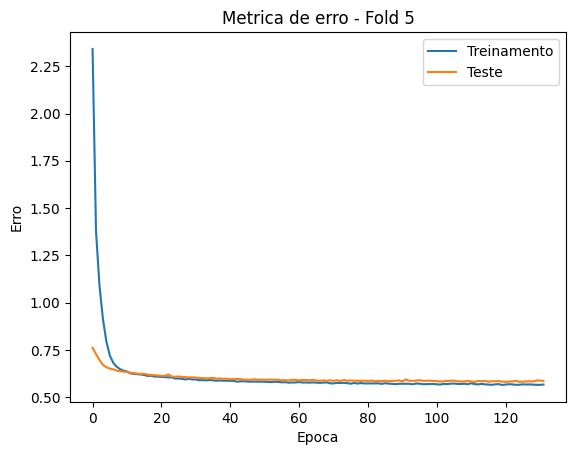

--> Acuracia (treino): 0.7269
--> Acuracia (teste): 0.7004
--> E_out - E_in = 0.0277
--> acc_in - acc_out = 0.0265


--- Treinando Fold 6/6 ---
Epoch 161: early stopping
Restoring model weights from the end of the best epoch: 141.


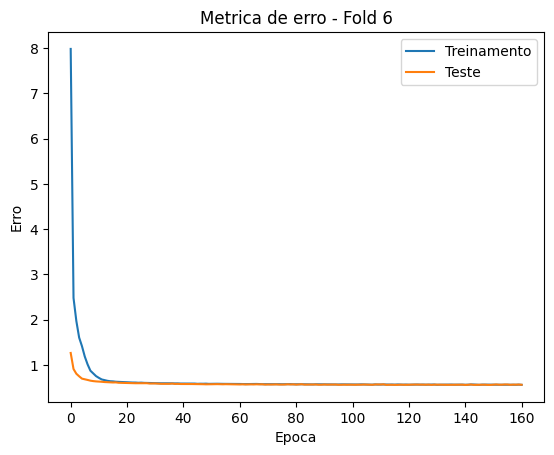

--> Acuracia (treino): 0.7285
--> Acuracia (teste): 0.7103
--> E_out - E_in = 0.0104
--> acc_in - acc_out = 0.0183


✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)
Média Acuracia (treino): 0.7243 (+/- 0.0041)
Média Acuracia (teste): 0.7112 (+/- 0.0056)
Média Erro de Generalização (E_out - E_in): 0.0164


In [ ]:
X_np = np.array(X)
y_np = np.array(y)

es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_test = []
history_list = []
ein_list = []
eout_list = []
i = 0

for train_index, test_index in skf.split(X_np, y_np):
    i = i + 1
    print(f"\n--- Treinando Fold {i}/6 ---")

    X_train_fold, X_test_fold = X_np[train_index], X_np[test_index]
    y_train_fold, y_test_fold = y_np[train_index], y_np[test_index]

    X_train_fold_df = pd.DataFrame(X_train_fold, columns=X.columns)
    X_test_fold_df   = pd.DataFrame(X_test_fold, columns=X.columns)

    scaler = StandardScaler()
    X_train_fold_df.loc[:, quant_cols] = scaler.fit_transform(X_train_fold_df[quant_cols])
    X_test_fold_df.loc[:, quant_cols] = scaler.transform(X_test_fold_df[quant_cols])

    X_train_fold = X_train_fold_df.values
    X_test_fold = X_test_fold_df.values

    model = Sequential()
    model.add(Input(shape=(d,)))

    model.add(Dense(22, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=200,
        batch_size=BATCH_SIZE,
        callbacks=[es_callback],
        verbose=0
    )
    history_list.append(history)

    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    E_out, accuracy_test = model.evaluate(X_test_fold, y_test_fold, batch_size=BATCH_SIZE, verbose=0)

    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)
    ein_list.append(E_in)
    eout_list.append(E_out)

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Teste'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (teste): {accuracy_test:.4f}')
    print(f"--> E_out - E_in = {E_out - E_in:.4f}")
    print(f"--> acc_in - acc_out = {accuracy_train - accuracy_test:.4f}\n")

avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_test = np.mean(accuracies_test)
avg_ein = np.mean(ein_list)
avg_eout = np.mean(eout_list)

print("\n" + "="*70)
print("✅ RESULTADOS MÉDIOS FINAIS DO K-FOLD (6 Folds)")
print(f"Média Acuracia (treino): {avg_accuracy_train:.4f} (+/- {np.std(accuracies_train):.4f})")
print(f"Média Acuracia (teste): {avg_accuracy_test:.4f} (+/- {np.std(accuracies_test):.4f})")
print(f"Média Erro de Generalização (E_out - E_in): {avg_eout - avg_ein:.4f}")
print("="*70)

## 5.2 RandomForest

In [ ]:
RANDOM_STATE = 32

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

param_grid_rf = {
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [7, 12, 20, None],
    'max_features': ['sqrt', 'log2', None]
} # 4 * 4 * 3 = 48 combinações

cv_folds = 5
skf_rf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)

rf_estimator = RandomForestClassifier(random_state=RANDOM_STATE)

grid_search_rf = GridSearchCV(
    estimator=rf_estimator,
    param_grid=param_grid_rf,
    cv=skf_rf,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

print("\n" + "="*70)
print(f"Iniciando Grid Search para Random Forest ({len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['max_features'])} combinações x {cv_folds} Folds)...")
start_time = time.time()

grid_search_rf.fit(X_train_np, y_train_np)

end_time = time.time()
print(f"Grid Search concluído em {end_time - start_time:.2f} segundos.")


Iniciando Grid Search para Random Forest (48 combinações x 5 Folds)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid Search concluído em 1135.38 segundos.


In [ ]:
best_rf_score = grid_search_rf.best_score_ # Acurácia média da validação cruzada
best_rf_params = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_ # Modelo melhor otimizado

print("\n" + "="*70)
print("MELHOR MODELO RANDOM FOREST OTIMIZADO")
print(f"Média Acurácia de Validação ({cv_folds} Folds): {best_rf_score:.4f}")
print("Melhores Parâmetros Encontrados:")
print(f"  - n_estimators: {best_rf_params['n_estimators']}")
print(f"  - max_depth: {best_rf_params['max_depth']}")
print(f"  - max_features: {best_rf_params['max_features']}")
print("="*70)


MELHOR MODELO RANDOM FOREST OTIMIZADO
Média Acurácia de Validação (5 Folds): 0.7074
Melhores Parâmetros Encontrados:
  - n_estimators: 100
  - max_depth: None
  - max_features: log2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Desempenho do Random Forest Final
Ein (Erro treino): 0.0000
Eout (Erro teste): 0.3008

Relatório de classificação (Teste):
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1397
           1       0.71      0.68      0.69      1412

    accuracy                           0.70      2809
   macro avg       0.70      0.70      0.70      2809
weighted avg       0.70      0.70      0.70      2809



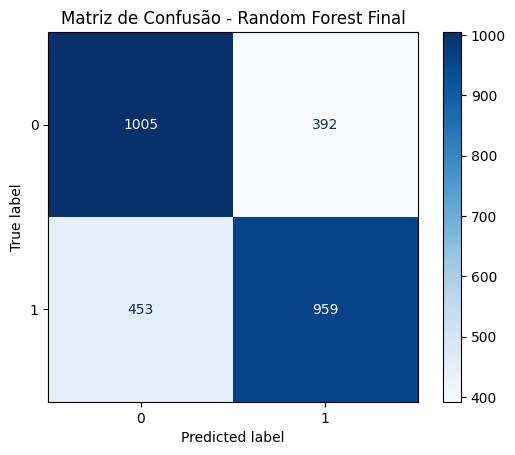

In [ ]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

print("\nDesempenho do Random Forest Final")
print(f"Ein (Erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (Erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("\nRelatório de classificação (Teste):")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Matriz de Confusão - Random Forest Final")
plt.show()

## 5.3 SVM

In [ ]:
RANDOM_STATE = 32

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='rbf', random_state=RANDOM_STATE)
model.fit(X_train, y_train)

print("#VS: " + str(model.n_support_))
print(model.support_vectors_)

#VS: [4026 3920]
[[ 0.22840362  0.76597857  0.55904965 ...  0.38876227  0.56610371
  -0.08467038]
 [ 0.22840362  0.76597857  0.55904965 ...  1.41355647  3.36232758
   0.11950254]
 [ 0.22840362 -1.30551956  0.55904965 ...  0.84904066  0.73876716
  -0.23774316]
 ...
 [ 0.22840362  0.76597857 -1.78874989 ...  0.37922014 -0.27026493
  -0.37786161]
 [ 0.22840362 -1.30551956  0.55904965 ... -1.14070447 -0.63191497
  -0.38003205]
 [ 0.22840362 -1.30551956 -1.78874989 ... -0.70120253 -0.48708556
  -0.29121106]]


Ein (erro treino): 0.2330
Eout (erro teste): 0.3104
Acurácia (treino): 0.7670
Acurácia (teste): 0.6896
Total de vetores de suporte: 7946

Classification Report (teste):
              precision    recall  f1-score   support

           0     0.6850    0.6958    0.6903      1397
           1     0.6942    0.6834    0.6888      1412

    accuracy                         0.6896      2809
   macro avg     0.6896    0.6896    0.6896      2809
weighted avg     0.6896    0.6896    0.6896      2809



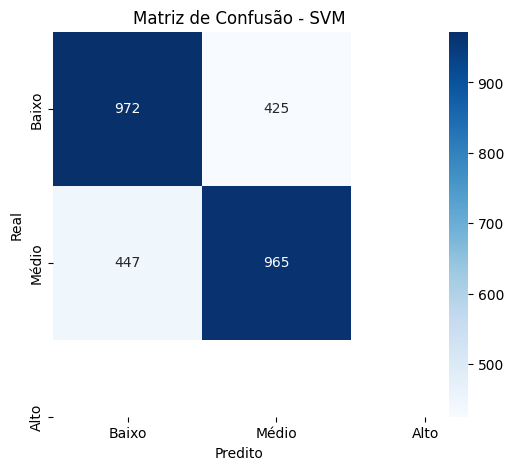

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"Ein (erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print(f"Acurácia (treino): {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Acurácia (teste): {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Total de vetores de suporte: {len(model.support_)}")

print("\nClassification Report (teste):")
print(classification_report(y_test, y_pred_test, digits=4))

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo","Médio","Alto"], yticklabels=["Baixo","Médio","Alto"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

In [ ]:
param_grid = [
    {"kernel": ["linear"], "C": [0.1, 1, 10, 50]},
    {"kernel": ["rbf"], "C": [0.1, 1, 10, 50], "gamma": ["scale", "auto", 0.001, 0.01]},
    {"kernel": ["poly"], "C": [0.1, 1, 10, 50], "gamma": ["scale", "auto", 0.001, 0.01], "degree": [2, 3]}
]

svm_clf = SVC(random_state=RANDOM_STATE)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    cv=cv_folds,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

print("\nIniciando GridSearch para SVM...")
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

print(f"GridSearch concluído em {end_time - start_time:.2f} segundos.")

In [ ]:
print("\nMelhores hiperparâmetros encontrados:")
print(grid.best_params_)

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

print(f"Ein (erro treino): {1 - accuracy_score(y_train, y_pred_train):.4f}")
print(f"Eout (erro teste): {1 - accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report (teste):")
print(classification_report(y_test, y_pred_test, digits=4))

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo","Médio","Alto"], yticklabels=["Baixo","Médio","Alto"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

best_model = grid.best_estimator_
print(f"Total de vetores de suporte: {len(best_model.support_)}")